# Prétraitement

Notebook traitant les formats et les valeurs manquantes dans le but de créer un dataframe adapté à l'input d'un réseau de neurones. 

Le traitement des valeurs manquantes est lent et critiquable : il est probablement possible de créer des programmes beaucoup plus efficaces pour traiter les valeurs manquantes. Notamment, nous n'avons pas pu utiliser les fonctions générales existantes d'interpolation, qui brutaient énormement nos séries. Une bouche "for" est donc utilisée pour le traitement, d'où la lenteur de nos programmes. 
De plus, un programme traitant uniquement les valeurs manquantes sans passer en revue toute la série, aurait été plus performant. 

Le traitement des valeurs manquantes n'étant pas le coeur de notre projet, et le temps nous étant compté, nous ne tentons pas d'améliorer l'efficacité des programmes rédigés dans ce notebook. 

In [3]:
# Importation des packages 
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates
from random import *

In [2]:
path_safran = 'C:/Users/louis/OneDrive/Documents/ENSAE/2A/Safran/db_anonymisee_23112020.csv'
safran=pd.read_csv(path_safran,sep=';')

In [3]:
safran.head()

,Unnamed: 0,engine_serial_number,engine_family,engine_series,date,cycles,cycles_counter,egt_margin,var_mot_1,flight_leg_hours,...,Config_B_rank,WW_indicator,WW_rank,config_A,config_B,var_env_1,var_env_2,var_env_3,var_env_4,var_env_5
0,1,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 06:29:58,"14,6994018817204",14,"0,88164595777172","-0,313549479463945","0,857777777777778",...,0.0,0,0.0,Config_A_1,Config_B_1,"-0,261068039892915","0,193871444563971","0,448626837816052",0.0,"0,601803253301208"
1,2,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 08:10:00,"15,2842741935484",15,"0,792029198534478","0,00633010844634316","0,794166666666667",...,0.0,0,0.0,Config_A_1,Config_B_1,"-0,0642022854971854","0,273855127894862","1,50084830667547",0.0,"-1,05696480756781"
2,3,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 09:55:00,"15,898185483871",16,"0,706729072821315","-0,286324152682434","0,736666666666667",...,0.0,0,0.0,Config_A_1,Config_B_1,"-0,292673075440896","0,193871444563971","0,764293278473876",0.0,"0,149411963973295"
3,4,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 11:36:53,"16,493874327957",17,"0,702077542200021","0,430173809670278","0,8025",...,0.0,0,0.0,Config_A_1,Config_B_1,"0,0700560728074165","0,273855127894862","1,50084830667547",0.0,"-1,05696480756781"
4,5,ESN_1,Engine_family_1,Engine_series_1,2019-04-30 04:28:40,"22,4095430107527",18,"0,645940989733346","0,299419735518525","0,8175",...,0.0,0,0.0,Config_A_1,Config_B_1,"-0,463184861568854","0,193871444563971","0,448626837816052",0.0,"0,601803253301208"


In [4]:
safran.shape

(2913834, 25)

Nous avons sous la main une base de données d'environ 3 millions de lignes, chacune est représenté par 25 variables. 

In [5]:
safran['engine_serial_number'].nunique()

1397

### 1. Les formats 

In [6]:
safran.dtypes

Unnamed: 0                int64
engine_serial_number     object
engine_family            object
engine_series            object
date                     object
cycles                   object
cycles_counter            int64
egt_margin               object
var_mot_1                object
flight_leg_hours         object
event_rank                int64
egt_slope                object
SV_indicator              int64
SV_rank                 float64
Config_B_indicator        int64
Config_B_rank           float64
WW_indicator              int64
WW_rank                 float64
config_A                 object
config_B                 object
var_env_1                object
var_env_2                object
var_env_3                object
var_env_4               float64
var_env_5                object
dtype: object

Certaines variables ont un format qui ne leur correspond pas, réglons cela : 

In [7]:
# Transformation du format de la variable date en datetime 
safran['date'] = pd.to_datetime(safran['date'], format="%Y/%m/%d %H:%M:%S")

In [8]:
# Transformation du format des variable egt_margin, cycles, var_mot_1,flight_leg_hours et les variables environnementales 
# continues  en float (sauf pour les valeurs 'nan')
def replace_value (x):
    try: 
        return x.replace(",", ".")
    except AttributeError:
        return np.NaN
safran['egt_margin'] = safran['egt_margin'].map(replace_value)
safran['egt_margin']=pd.to_numeric(safran['egt_margin'])
safran['cycles'] = safran['cycles'].map(replace_value)
safran['cycles']=pd.to_numeric(safran['cycles'])
safran['var_mot_1']=safran['var_mot_1'].map(replace_value)
safran['var_mot_1']=pd.to_numeric(safran['var_mot_1'])
safran['flight_leg_hours']=safran['flight_leg_hours'].map(replace_value)
safran['flight_leg_hours']=pd.to_numeric(safran['flight_leg_hours'])
safran['egt_slope']=safran['egt_slope'].map(replace_value)
safran['egt_slope']=pd.to_numeric(safran['egt_slope'])
safran['var_env_1']=safran['var_env_1'].map(replace_value)
safran['var_env_1']=pd.to_numeric(safran['var_env_1'])
safran['var_env_2']=safran['var_env_2'].map(replace_value)
safran['var_env_2']=pd.to_numeric(safran['var_env_2'])
safran['var_env_3']=safran['var_env_3'].map(replace_value)
safran['var_env_3']=pd.to_numeric(safran['var_env_3'])
safran['var_env_5']=safran['var_env_5'].map(replace_value)
safran['var_env_5']=pd.to_numeric(safran['var_env_5'])

In [9]:
safran.dtypes

Unnamed: 0                       int64
engine_serial_number            object
engine_family                   object
engine_series                   object
date                    datetime64[ns]
cycles                         float64
cycles_counter                   int64
egt_margin                     float64
var_mot_1                      float64
flight_leg_hours               float64
event_rank                       int64
egt_slope                      float64
SV_indicator                     int64
SV_rank                        float64
Config_B_indicator               int64
Config_B_rank                  float64
WW_indicator                     int64
WW_rank                        float64
config_A                        object
config_B                        object
var_env_1                      float64
var_env_2                      float64
var_env_3                      float64
var_env_4                      float64
var_env_5                      float64
dtype: object

## 2. Les valeurs manquantes 

In [10]:
safran.isnull().sum()

Unnamed: 0                   0
engine_serial_number         0
engine_family                0
engine_series                0
date                         0
cycles                       0
cycles_counter               0
egt_margin              992605
var_mot_1               992607
flight_leg_hours        477302
event_rank                   0
egt_slope                90397
SV_indicator                 0
SV_rank                 992605
Config_B_indicator           0
Config_B_rank           992605
WW_indicator                 0
WW_rank                 992605
config_A                     0
config_B                     0
var_env_1               451389
var_env_2               258150
var_env_3               625419
var_env_4               622175
var_env_5               625530
dtype: int64

In [11]:
safran.head(20)

,Unnamed: 0,engine_serial_number,engine_family,engine_series,date,cycles,cycles_counter,egt_margin,var_mot_1,flight_leg_hours,...,Config_B_rank,WW_indicator,WW_rank,config_A,config_B,var_env_1,var_env_2,var_env_3,var_env_4,var_env_5
0,1,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 06:29:58,14.699402,14,0.881646,-0.313549,0.857778,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.261068,0.193871,0.448627,0.0,0.601803
1,2,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 08:10:00,15.284274,15,0.792029,0.006330,0.794167,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.064202,0.273855,1.500848,0.0,-1.056965
2,3,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 09:55:00,15.898185,16,0.706729,-0.286324,0.736667,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.292673,0.193871,0.764293,0.0,0.149412
3,4,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 11:36:53,16.493874,17,0.702078,0.430174,0.802500,...,0.0,0,0.0,Config_A_1,Config_B_1,0.070056,0.273855,1.500848,0.0,-1.056965
4,5,ESN_1,Engine_family_1,Engine_series_1,2019-04-30 04:28:40,22.409543,18,0.645941,0.299420,0.817500,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.463185,0.193871,0.448627,0.0,0.601803
5,6,ESN_1,Engine_family_1,Engine_series_1,2019-04-30 06:06:47,22.983209,19,0.784083,0.317381,0.857778,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.366676,0.273855,1.079960,0.0,-0.001385
6,7,ESN_1,Engine_family_1,Engine_series_1,2019-04-30 09:21:07,24.119432,20,0.794602,0.302614,0.689722,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.477086,0.193871,0.974738,0.0,-0.805636
7,8,ESN_1,Engine_family_1,Engine_series_1,2019-04-30 10:59:07,24.692416,21,0.650154,0.635736,0.651944,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.328584,0.234348,1.606070,0.0,-2.464404
8,9,ESN_1,Engine_family_1,Engine_series_1,2019-04-30 14:27:15,25.909325,22,0.620501,0.351562,0.995000,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.214059,0.193871,0.869515,0.0,-0.805636
9,10,ESN_1,Engine_family_1,Engine_series_1,2019-04-30 16:21:55,26.579755,23,0.932190,-0.246205,1.357778,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.109072,0.503899,0.974738,0.0,0.199678


De nombreuses variables ont un nombre important de valeurs manquantes.

###  2.1 Traitement des valeurs manquantes pour egt_margin

In [12]:
print(' Part des valeurs manquantes pour egt_margin : ', int(safran['egt_margin'].isnull().sum() /safran['egt_margin'].size * 100),'%')

 Part des valeurs manquantes pour egt_margin :  34 %


egt_margin est la variable que nous cherchons à expliquer. Pour pouvoir entrainer et tester notre futur modèle il nous faudra l'ensemble des données. Il faut donc traiter les valeurs manquantes, qui représentent une part importante du dataframe pour cette varible (34%).  

Pour cela nous proposons d'appliquer l'interpolation des données manquantes. 

Nous traitons séparemment les différents avions :

In [13]:
print('Taille de la base complete :', safran.shape[0], '\n', 'Nombre d\'avions : ', safran['engine_serial_number'].nunique())

Taille de la base complete : 2913834 
 Nombre d'avions :  1397


In [14]:
safran.groupby(by=['engine_serial_number']).size().describe()

count    1397.000000
mean     2085.779528
std      1504.761387
min         1.000000
25%       791.000000
50%      1824.000000
75%      2973.000000
max      7919.000000
dtype: float64

En moyenne, un avion est représenté par 2 000 vols (écart type de 1 500). 

Au minimum un avion est représenté par 1 vol. Dans notre base, le maximum est de 7 919 vols pour un avion. 

Effectuons quelques analyses exploratoires pour un avion en particulier : Celui représenté par le moteur ESN_1 :

In [15]:
Avion1= safran[safran['engine_serial_number']=='ESN_1']
Avion1

,Unnamed: 0,engine_serial_number,engine_family,engine_series,date,cycles,cycles_counter,egt_margin,var_mot_1,flight_leg_hours,...,Config_B_rank,WW_indicator,WW_rank,config_A,config_B,var_env_1,var_env_2,var_env_3,var_env_4,var_env_5
0,1,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 06:29:58,14.699402,14,0.881646,-0.313549,0.857778,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.261068,0.193871,0.448627,0.0,0.601803
1,2,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 08:10:00,15.284274,15,0.792029,0.006330,0.794167,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.064202,0.273855,1.500848,0.0,-1.056965
2,3,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 09:55:00,15.898185,16,0.706729,-0.286324,0.736667,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.292673,0.193871,0.764293,0.0,0.149412
3,4,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 11:36:53,16.493874,17,0.702078,0.430174,0.802500,...,0.0,0,0.0,Config_A_1,Config_B_1,0.070056,0.273855,1.500848,0.0,-1.056965
4,5,ESN_1,Engine_family_1,Engine_series_1,2019-04-30 04:28:40,22.409543,18,0.645941,0.299420,0.817500,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.463185,0.193871,0.448627,0.0,0.601803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5902,5903,ESN_1,Engine_family_1,Engine_series_1,2022-02-19 05:33:00,5862.761492,5916,1.195044,-0.515554,1.069444,...,6.0,0,6.0,Config_A_1,Config_B_4,-0.457841,1.536012,-0.077484,0.0,0.400740
5903,5904,ESN_1,Engine_family_1,Engine_series_1,2022-02-19 08:01:36,5863.230860,5917,1.204687,-0.667087,1.220556,...,6.0,0,6.0,Config_A_1,Config_B_4,-0.578924,1.444366,0.448627,0.0,-0.755371
5904,5905,ESN_1,Engine_family_1,Engine_series_1,2022-02-19 10:22:31,5863.675960,5918,1.106944,-0.630176,1.596944,...,6.0,0,6.0,Config_A_1,Config_B_4,-0.503889,1.536012,0.343405,0.0,-0.755371
5905,5906,ESN_1,Engine_family_1,Engine_series_1,2022-02-19 13:14:25,5864.218924,5919,1.006894,0.586222,1.739167,...,6.0,0,6.0,Config_A_1,Config_B_4,-0.558964,1.507663,0.553849,0.0,-0.906168


In [16]:
Avion1['egt_margin'].isnull().sum()

1880

Testons l'interpolation pour le premier avion 

In [17]:
# On commence par indexer le DataFrame par les dates 
Avion1.index = Avion1['date']
del Avion1['date']

In [18]:
# Méthode "Time" car importance du temps
Avion1 = Avion1.assign(InterpolateTime=Avion1.egt_margin.interpolate(method='time'))

<AxesSubplot:xlabel='date'>

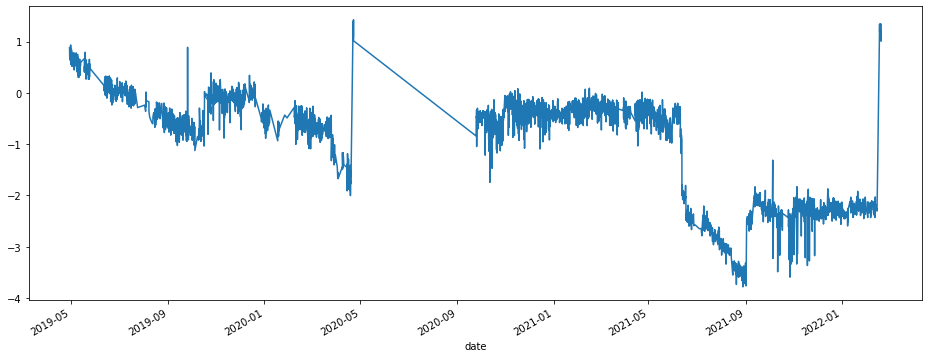

In [19]:
Avion1['InterpolateTime'].plot(figsize = (16,6))

<AxesSubplot:xlabel='date'>

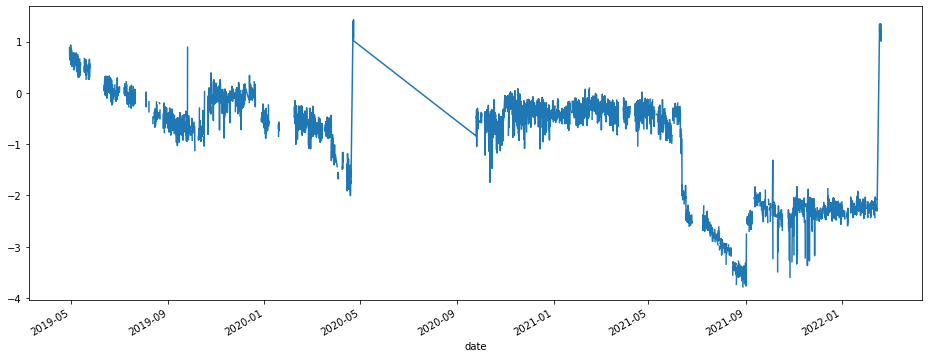

In [20]:
Avion1['egt_margin'].plot(figsize = (16,6))

On teste sur la base complète :

In [21]:
safran_test = safran.copy()
safran_test.index = safran_test['date']
del safran_test['date']

In [22]:
safran_test.groupby('engine_serial_number')
safran_test=safran_test.assign(InterpolateTime=safran_test.egt_margin.interpolate(method='time'))

In [23]:
safran_test.InterpolateTime.isnull().sum()

0

<AxesSubplot:xlabel='date'>

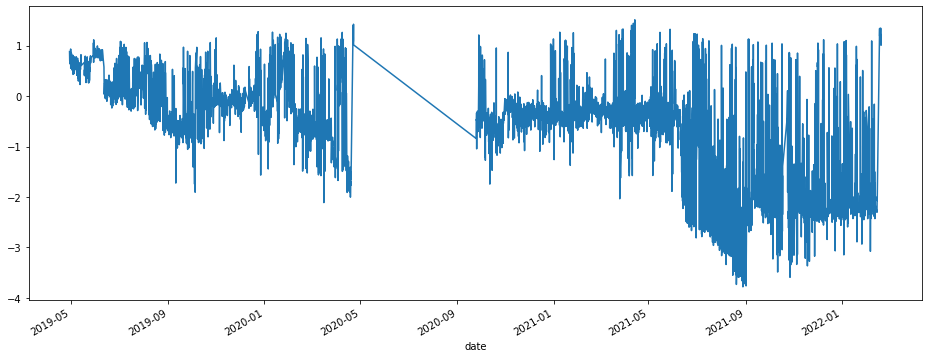

In [24]:
safran_test[safran_test['engine_serial_number']=='ESN_1']['InterpolateTime'].plot(figsize = (16,6))

Ressemble pas ... 

Testons un par un pour limiter le bruit :

In [25]:
# Cette cellule est relativement longue ( de l'ordre de 10-15 minutes)
# On divise en deux pour limiter le temps de calcul

series = safran['engine_serial_number'].unique()
series_1,series_2 = series[0: int(len(series)/2)], series[int(len(series)/2):int(len(series))]

calage_1 = series_1[0]
calage_2 = series_2[0]

Avion_1= safran[safran['engine_serial_number']==calage_1]
Avion_2= safran[safran['engine_serial_number']==calage_2]
series_1=np.delete(series_1,0)
series_2=np.delete(series_2,0)

Avion_1.index = Avion_1['date']
del Avion_1['date']
Avion_1 = Avion_1.assign(Interpolate_egt_margin=Avion_1.egt_margin.interpolate(method='time'))

Avion_2.index = Avion_2['date']
del Avion_2['date']
Avion_2 = Avion_2.assign(Interpolate_egt_margin=Avion_2.egt_margin.interpolate(method='time'))

for i in series_1 : 
    avion_i= safran[safran['engine_serial_number']==i]
    avion_i.index = avion_i['date']
    del avion_i['date']
    avion= avion_i.assign(Interpolate_egt_margin=avion_i.egt_margin.interpolate(method='time'))
    Avion_1 = pd.concat( [Avion_1,avion])
    print("Chargement de l'avion", i, " sur ", "la première serie (jusqu'à :",series_1[-1],")")

for i in series_2 : 
    avion_i= safran[safran['engine_serial_number']==i]
    avion_i.index = avion_i['date']
    del avion_i['date']
    avion= avion_i.assign(Interpolate_egt_margin=avion_i.egt_margin.interpolate(method='time'))
    Avion_2 = pd.concat( [Avion_2,avion])
    print("Chargement de l'avion", i, " sur ", "la deuxieme serie (jusqu'à :",series_2[-1],")")

    
Avions=pd.concat([Avion_1,Avion_2])

Chargement de l'avion ESN_2  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_3  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_4  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_5  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_6  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_7  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_8  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_9  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_10  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_11  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_12  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_13  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_14  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_15  sur  la première

<AxesSubplot:xlabel='date'>

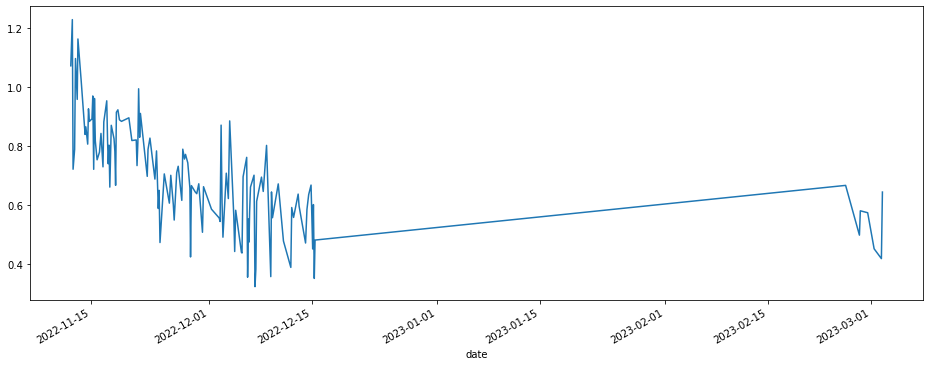

In [26]:
# Affichage de l'évolution de la marge egt au cours du temps pour un avion tiré au hasard
n=randint(0,len(series))
Avions[Avions['engine_serial_number']==series[n]]['Interpolate_egt_margin'].plot(figsize = (16,6))

In [27]:
# Verifions qu'il n'y a plus de valeur manquante pour la marge egt 
Avions.Interpolate_egt_margin.isnull().sum()

0

### 2.2 Traitement des valeurs manquantes pour var_mot_1

In [28]:
# Création d'une copie de Avions en cas d'erreur 
Test= Avions.copy()

In [29]:
Test.var_mot_1.isnull().sum() # Variable d'utilisation du moteur 

992607

In [30]:
print(' Le nombre de valeurs manquantes pour la variable var_moteur est de ', Test.var_mot_1.isnull().sum()/Test.var_mot_1.shape[0]*100, '%')

 Le nombre de valeurs manquantes pour la variable var_moteur est de  34.06532424290471 %


<AxesSubplot:xlabel='date'>

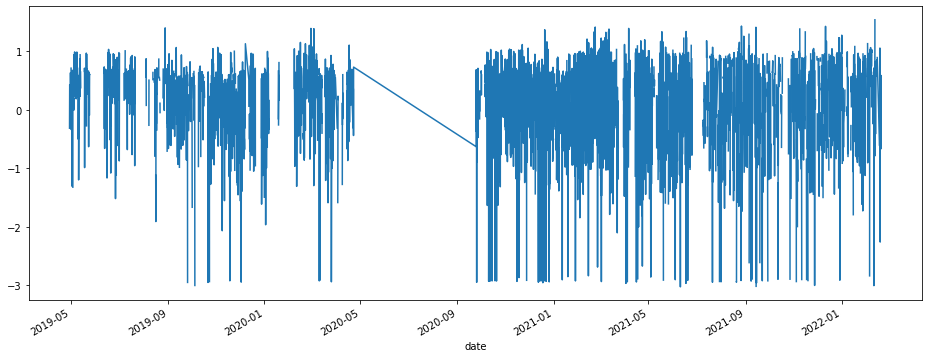

In [31]:
# Exemple pour l'avion représenté par le moteur ESN_1
Avion1['var_mot_1'].plot(figsize = (16,6))

De la même façon que pour la variable egt_margin on effectue une interpolation temporelle. 

In [32]:
# On fait deux boucles pour limiter le temps de calculs 
# Attention il faut quand même compter 10 minutes pour effectuer cette cellule  
Avion_1= Test[Test['engine_serial_number']==calage_1]
Avion_1 = Avion_1.assign(Interpolate_var_mot_1=Avion_1.var_mot_1.interpolate(method='time'))

Avion_2= Test[Test['engine_serial_number']==calage_2]
Avion_2 = Avion_2.assign(Interpolate_var_mot_1=Avion_2.var_mot_1.interpolate(method='time'))


for i in series_1 :
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_var_mot_1=avion_i.var_mot_1.interpolate(method='time'))
    Avion_1=pd.concat( [Avion_1,avion])
    print("Chargement de l'avion", i, " sur ", "la première serie (jusqu'à :",series_1[-1],")")
    
for i in series_2 : 
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_var_mot_1=avion_i.var_mot_1.interpolate(method='time'))
    Avion_2 = pd.concat( [Avion_2,avion])
    print("Chargement de l'avion", i, " sur ", "la deuxieme serie (jusqu'à :",series_2[-1],")")

    
Avions=pd.concat([Avion_1,Avion_2])

Chargement de l'avion ESN_2  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_3  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_4  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_5  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_6  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_7  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_8  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_9  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_10  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_11  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_12  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_13  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_14  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_15  sur  la première

In [33]:
Avions

,Unnamed: 0,engine_serial_number,engine_family,engine_series,cycles,cycles_counter,egt_margin,var_mot_1,flight_leg_hours,event_rank,...,WW_rank,config_A,config_B,var_env_1,var_env_2,var_env_3,var_env_4,var_env_5,Interpolate_egt_margin,Interpolate_var_mot_1
date,,,,,,,,,,,,,,,,,,,,,
2019-04-29 06:29:58,1,ESN_1,Engine_family_1,Engine_series_1,14.699402,14,0.881646,-0.313549,0.857778,0,...,0.0,Config_A_1,Config_B_1,-0.261068,0.193871,0.448627,0.0,0.601803,0.881646,-0.313549
2019-04-29 08:10:00,2,ESN_1,Engine_family_1,Engine_series_1,15.284274,15,0.792029,0.006330,0.794167,0,...,0.0,Config_A_1,Config_B_1,-0.064202,0.273855,1.500848,0.0,-1.056965,0.792029,0.006330
2019-04-29 09:55:00,3,ESN_1,Engine_family_1,Engine_series_1,15.898185,16,0.706729,-0.286324,0.736667,0,...,0.0,Config_A_1,Config_B_1,-0.292673,0.193871,0.764293,0.0,0.149412,0.706729,-0.286324
2019-04-29 11:36:53,4,ESN_1,Engine_family_1,Engine_series_1,16.493874,17,0.702078,0.430174,0.802500,0,...,0.0,Config_A_1,Config_B_1,0.070056,0.273855,1.500848,0.0,-1.056965,0.702078,0.430174
2019-04-30 04:28:40,5,ESN_1,Engine_family_1,Engine_series_1,22.409543,18,0.645941,0.299420,0.817500,0,...,0.0,Config_A_1,Config_B_1,-0.463185,0.193871,0.448627,0.0,0.601803,0.645941,0.299420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01 17:28:50,2913830,ESN_1397,Engine_family_1,Engine_series_1,102.886000,130,0.899325,-0.081256,NaN,0,...,0.0,Config_A_5,Config_B_1,NaN,NaN,NaN,NaN,NaN,0.899325,-0.081256
2023-03-01 21:07:27,2913831,ESN_1397,Engine_family_1,Engine_series_1,103.042800,131,0.925950,0.694209,NaN,0,...,0.0,Config_A_5,Config_B_1,NaN,NaN,NaN,NaN,NaN,0.925950,0.694209
2023-03-02 12:02:07,2913832,ESN_1397,Engine_family_1,Engine_series_1,103.684900,132,0.970859,0.266096,NaN,0,...,0.0,Config_A_5,Config_B_1,NaN,NaN,NaN,NaN,NaN,0.970859,0.266096


In [34]:
# Affichage de l'évolution la variable d'utilisation du moteur  au cours du temps pour un avion tiré au hasard
n=randint(0,len(series))

<AxesSubplot:xlabel='date'>

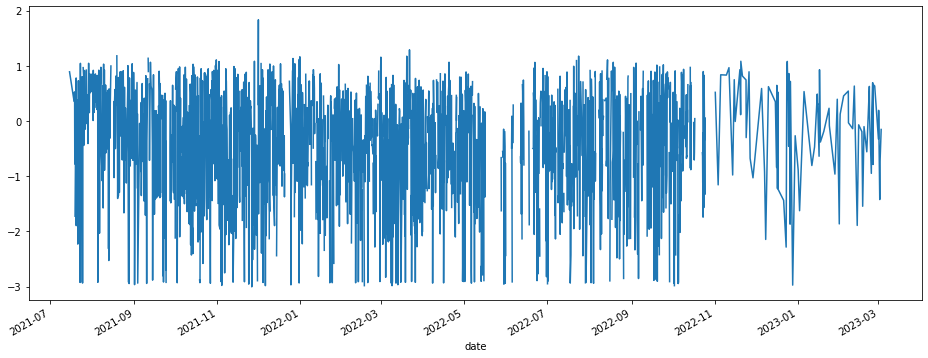

In [35]:
#Affichage avant traitement des valeurs manquantes :
Avions[Avions['engine_serial_number']==series[n]]['var_mot_1'].plot(figsize = (16,6))

<AxesSubplot:xlabel='date'>

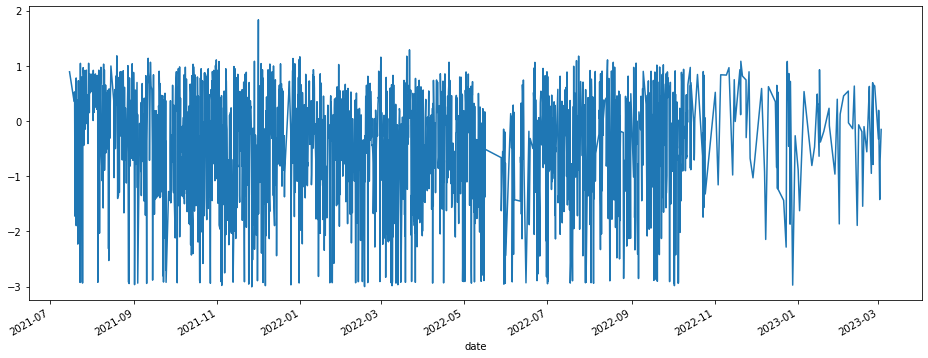

In [36]:
# Après traitement :
Avions[Avions['engine_serial_number']==series[n]]['Interpolate_var_mot_1'].plot(figsize = (16,6))

In [37]:
Avions['Interpolate_var_mot_1'].isnull().sum()

0

### 2.3 Traitement des valeurs manquantes pour flight_leg_hours

In [38]:
# Création d'une copie de Avions en cas d'erreur 
Test= Avions.copy()

In [39]:
Test.flight_leg_hours.isnull().sum() # Durée des vols

477302

<AxesSubplot:xlabel='date'>

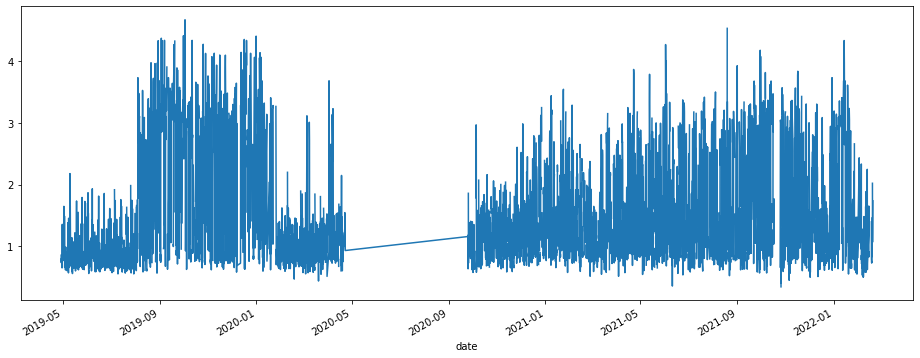

In [40]:
# Représentation pour le premier avion ESN_1
Avion1['flight_leg_hours'].plot(figsize = (16,6))

In [41]:
# On fait deux boucles pour limiter le temps de calculs 
# Attention il faut quand même compter 10 minutes pour effectuer cette cellule  
Avion_1= Test[Test['engine_serial_number']==calage_1]
Avion_1 = Avion_1.assign(Interpolate_flight_leg_hours=Avion_1.flight_leg_hours.interpolate(method='time'))

Avion_2= Test[Test['engine_serial_number']==calage_2]
Avion_2 = Avion_2.assign(Interpolate_flight_leg_hours=Avion_2.flight_leg_hours.interpolate(method='time'))


for i in series_1 :
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_flight_leg_hours=avion_i.flight_leg_hours.interpolate(method='time'))
    Avion_1=pd.concat( [Avion_1,avion])
    print("Chargement de l'avion", i, " sur ", "la première serie (jusqu'à :",series_1[-1],")")
    
for i in series_2 : 
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_flight_leg_hours=avion_i.flight_leg_hours.interpolate(method='time'))
    Avion_2 = pd.concat( [Avion_2,avion])
    print("Chargement de l'avion", i, " sur ", "la deuxieme serie (jusqu'à :",series_2[-1],")")

    
Avions=pd.concat([Avion_1,Avion_2])

Chargement de l'avion ESN_2  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_3  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_4  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_5  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_6  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_7  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_8  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_9  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_10  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_11  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_12  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_13  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_14  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_15  sur  la première

<AxesSubplot:xlabel='date'>

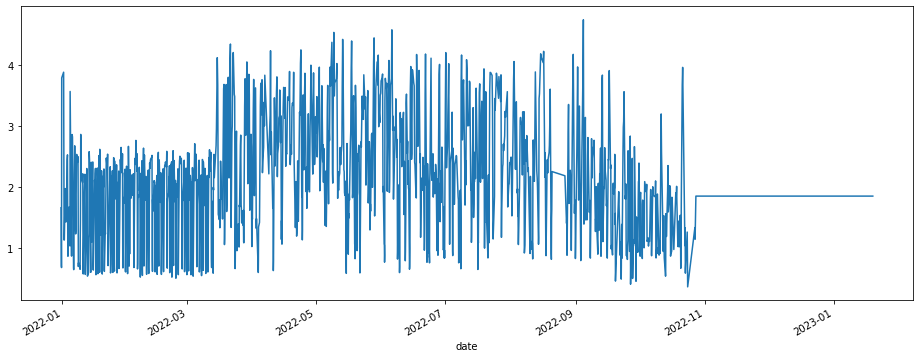

In [42]:
# Affichage de l'évolution la variable de durée de vols au cours du temps pour un avion tiré au hasard
n=randint(0,len(series))
Avions[Avions['engine_serial_number']==series[n]]['Interpolate_flight_leg_hours'].plot(figsize = (16,6))

In [45]:
#Vérifions qu'il n'y a plus de valeur manquantes
Avions['Interpolate_flight_leg_hours'].isnull().sum()

8496

In [46]:
Test = Avions.copy()

In [47]:
# On fait deux boucles pour limiter le temps de calculs 
# Attention il faut quand même compter 10 minutes pour effectuer cette cellule  
Avion_1= Test[Test['engine_serial_number']==calage_1]
Avion_1 = Avion_1.assign(Interpolate_flight_leg_hours=Avion_1.Interpolate_flight_leg_hours.interpolate(method='time', limit_direction='backward'))

Avion_2= Test[Test['engine_serial_number']==calage_2]
Avion_2 = Avion_2.assign(Interpolate_flight_leg_hours=Avion_2.Interpolate_flight_leg_hours.interpolate(method='time', limit_direction='backward'))


for i in series_1 :
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_flight_leg_hours=avion_i.Interpolate_flight_leg_hours.interpolate(method='time', limit_direction='backward'))
    Avion_1=pd.concat( [Avion_1,avion])
    print("Chargement de l'avion", i, " sur ", "la première serie (jusqu'à :",series_1[-1],")")
    
for i in series_2 : 
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_flight_leg_hours=avion_i.Interpolate_flight_leg_hours.interpolate(method='time', limit_direction='backward'))
    Avion_2 = pd.concat( [Avion_2,avion])
    print("Chargement de l'avion", i, " sur ", "la deuxieme serie (jusqu'à :",series_2[-1],")")

    
Avions=pd.concat([Avion_1,Avion_2])

Chargement de l'avion ESN_2  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_3  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_4  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_5  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_6  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_7  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_8  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_9  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_10  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_11  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_12  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_13  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_14  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_15  sur  la première

In [48]:
#Vérifions qu'il n'y a plus de valeur manquantes
Test['Interpolate_flight_leg_hours'].isnull().sum()

8496

In [49]:
Avions[Avions['Interpolate_flight_leg_hours'].isnull()==True]['engine_serial_number'].nunique()

67

Probleme pour 67 moteurs 

### 2.4 Traitement des valeurs manquantes pour egt_slope 

In [50]:
Avions.egt_slope.isnull().sum() # Pente egt entre deux événements 

90397

On revient sur le traitement de ces valeurs en fin de notebook. 

### 2.5 Traitement des valeurs manquantes pour SV_rank 

In [51]:
Avions.SV_rank.isnull().sum() # Nombre de fois passé en maintenance 

992605

<AxesSubplot:xlabel='date'>

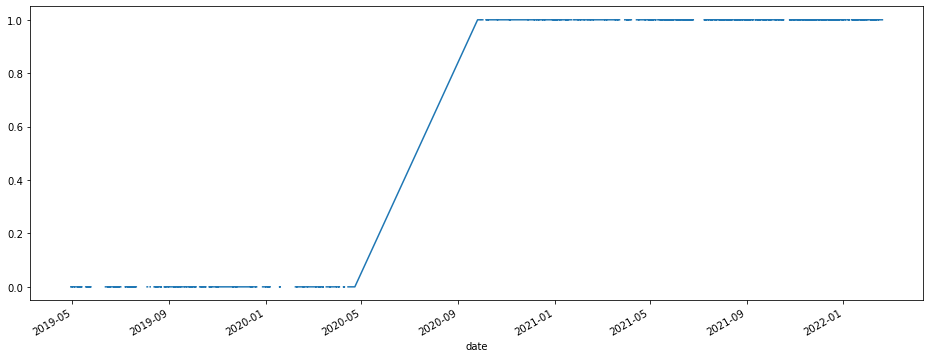

In [52]:
Avion1['SV_rank'].plot(figsize = (16,6))

Linéaire, on ne peut aller que de 1 en 1 : On utilise la méthode pad (se sert des valeurs existantes). 

In [53]:
Test=Avions.copy()
Test

,Unnamed: 0,engine_serial_number,engine_family,engine_series,cycles,cycles_counter,egt_margin,var_mot_1,flight_leg_hours,event_rank,...,config_A,config_B,var_env_1,var_env_2,var_env_3,var_env_4,var_env_5,Interpolate_egt_margin,Interpolate_var_mot_1,Interpolate_flight_leg_hours
date,,,,,,,,,,,,,,,,,,,,,
2019-04-29 06:29:58,1,ESN_1,Engine_family_1,Engine_series_1,14.699402,14,0.881646,-0.313549,0.857778,0,...,Config_A_1,Config_B_1,-0.261068,0.193871,0.448627,0.0,0.601803,0.881646,-0.313549,0.857778
2019-04-29 08:10:00,2,ESN_1,Engine_family_1,Engine_series_1,15.284274,15,0.792029,0.006330,0.794167,0,...,Config_A_1,Config_B_1,-0.064202,0.273855,1.500848,0.0,-1.056965,0.792029,0.006330,0.794167
2019-04-29 09:55:00,3,ESN_1,Engine_family_1,Engine_series_1,15.898185,16,0.706729,-0.286324,0.736667,0,...,Config_A_1,Config_B_1,-0.292673,0.193871,0.764293,0.0,0.149412,0.706729,-0.286324,0.736667
2019-04-29 11:36:53,4,ESN_1,Engine_family_1,Engine_series_1,16.493874,17,0.702078,0.430174,0.802500,0,...,Config_A_1,Config_B_1,0.070056,0.273855,1.500848,0.0,-1.056965,0.702078,0.430174,0.802500
2019-04-30 04:28:40,5,ESN_1,Engine_family_1,Engine_series_1,22.409543,18,0.645941,0.299420,0.817500,0,...,Config_A_1,Config_B_1,-0.463185,0.193871,0.448627,0.0,0.601803,0.645941,0.299420,0.817500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01 17:28:50,2913830,ESN_1397,Engine_family_1,Engine_series_1,102.886000,130,0.899325,-0.081256,NaN,0,...,Config_A_5,Config_B_1,NaN,NaN,NaN,NaN,NaN,0.899325,-0.081256,NaN
2023-03-01 21:07:27,2913831,ESN_1397,Engine_family_1,Engine_series_1,103.042800,131,0.925950,0.694209,NaN,0,...,Config_A_5,Config_B_1,NaN,NaN,NaN,NaN,NaN,0.925950,0.694209,NaN
2023-03-02 12:02:07,2913832,ESN_1397,Engine_family_1,Engine_series_1,103.684900,132,0.970859,0.266096,NaN,0,...,Config_A_5,Config_B_1,NaN,NaN,NaN,NaN,NaN,0.970859,0.266096,NaN


In [54]:
Avion_1= Test[Test['engine_serial_number']==calage_1]
Avion_1 = Avion_1.assign(Interpolate_SV_rank=Avion_1.SV_rank.interpolate(method='pad'))

In [55]:
# On fait deux boucles pour limiter le temps de calculs 
# Attention il faut quand même compter 10 minutes pour effectuer cette cellule  
Avion_1= Test[Test['engine_serial_number']==calage_1]
Avion_1 = Avion_1.assign(Interpolate_SV_rank=Avion_1.SV_rank.interpolate(method='pad'))

Avion_2= Test[Test['engine_serial_number']==calage_2]
Avion_2 = Avion_2.assign(Interpolate_SV_rank=Avion_2.SV_rank.interpolate(method='pad'))


for i in series_1 :
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_SV_rank=avion_i.SV_rank.interpolate(method='pad'))
    Avion_1=pd.concat( [Avion_1,avion])
    print("Chargement de l'avion", i, " sur ", "la première serie (jusqu'à :",series_1[-1],")")
    
for i in series_2 : 
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_SV_rank=avion_i.SV_rank.interpolate(method='pad'))
    Avion_2 = pd.concat( [Avion_2,avion])
    print("Chargement de l'avion", i, " sur ", "la deuxieme serie (jusqu'à :",series_2[-1],")")


Avions=pd.concat([Avion_1,Avion_2])

Chargement de l'avion ESN_2  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_3  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_4  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_5  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_6  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_7  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_8  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_9  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_10  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_11  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_12  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_13  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_14  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_15  sur  la première

188


<AxesSubplot:xlabel='date'>

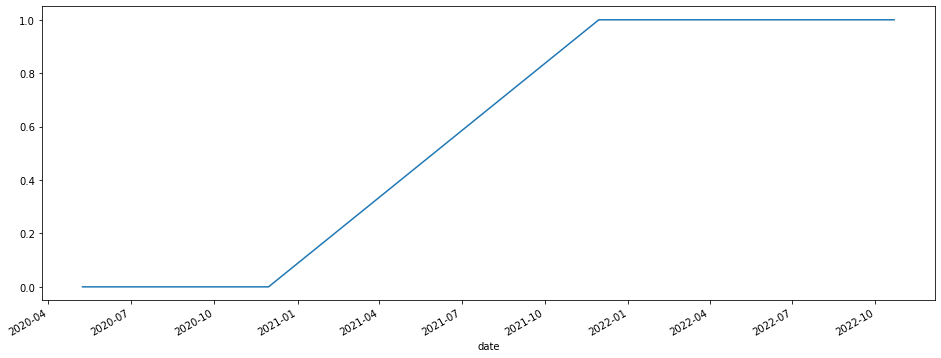

In [56]:
# Affichage de l'évolution du nombre de SV effectué sur un moteur
n=randint(0,len(series))
print(n)
Avions[Avions['engine_serial_number']==series[n]]['Interpolate_SV_rank'].plot(figsize = (16,6))

In [57]:
# On vérifie qu'il n'y a plus de valeur manquante :
Avions.Interpolate_SV_rank.isnull().sum()

0

### 2.6 Traitement des valeurs manquantes pour Config_B_rank 

In [58]:
Avions.Config_B_rank.isnull().sum() # Changement de format de la piece B

992605

<AxesSubplot:xlabel='date'>

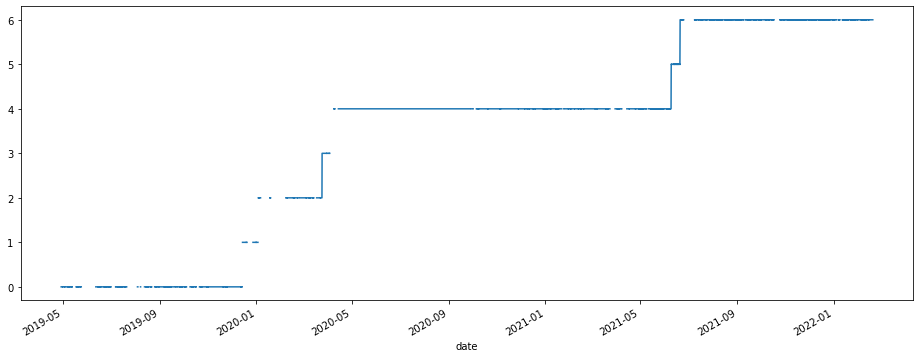

In [59]:
Avion1['Config_B_rank'].plot(figsize = (16,6))

In [60]:
Test=Avions.copy()

In [61]:
# On fait deux boucles pour limiter le temps de calculs 
# Attention il faut quand même compter 10 minutes pour effectuer cette cellule  
Avion_1= Test[Test['engine_serial_number']==calage_1]
Avion_1 = Avion_1.assign(Interpolate_Config_B_rank=Avion_1.Config_B_rank.interpolate(method='pad'))

Avion_2= Test[Test['engine_serial_number']==calage_2]
Avion_2 = Avion_2.assign(Interpolate_Config_B_rank=Avion_2.Config_B_rank.interpolate(method='pad'))


for i in series_1 :
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_Config_B_rank=avion_i.Config_B_rank.interpolate(method='pad'))
    Avion_1=pd.concat( [Avion_1,avion])
    print("Chargement de l'avion", i, " sur ", "la première serie (jusqu'à :",series_1[-1],")")
    
for i in series_2 : 
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_Config_B_rank=avion_i.Config_B_rank.interpolate(method='pad'))
    Avion_2 = pd.concat( [Avion_2,avion])
    print("Chargement de l'avion", i, " sur ", "la deuxieme serie (jusqu'à :",series_2[-1],")")


Avions=pd.concat([Avion_1,Avion_2])

Chargement de l'avion ESN_2  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_3  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_4  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_5  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_6  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_7  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_8  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_9  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_10  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_11  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_12  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_13  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_14  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_15  sur  la première

<AxesSubplot:xlabel='date'>

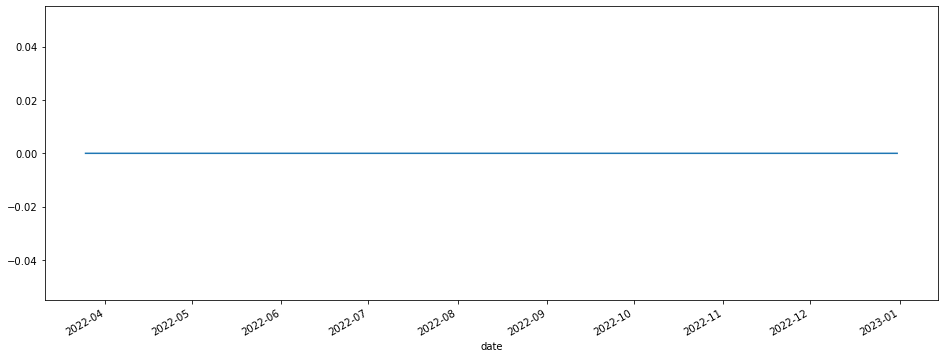

In [62]:
# Affichage de l'évolution du nombre de SV effectué sur un moteur
n=randint(0,len(series))
Avions[Avions['engine_serial_number']==series[n]]['Interpolate_Config_B_rank'].plot(figsize = (16,6))

In [63]:
# On vérifie qu'il n'y a plus de valeur manquante :
Avions.Interpolate_Config_B_rank.isnull().sum()

0

### 2.7 Traitement des valeurs manquantes pour WW_rank 

In [64]:
Avions.WW_rank.isnull().sum() # Binaire : 1 si waterwash effectué

992605

<AxesSubplot:xlabel='date'>

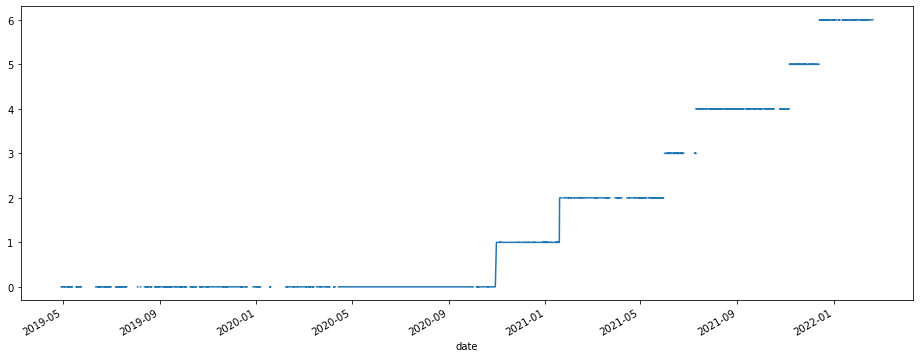

In [65]:
Avion1['WW_rank'].plot(figsize = (16,6))

In [66]:
Test=Avions.copy()

In [67]:
# On fait deux boucles pour limiter le temps de calculs 
# Attention il faut quand même compter 10 minutes pour effectuer cette cellule  
Avion_1= Test[Test['engine_serial_number']==calage_1]
Avion_1 = Avion_1.assign(Interpolate_WW_rank=Avion_1.WW_rank.interpolate(method='pad'))

Avion_2= Test[Test['engine_serial_number']==calage_2]
Avion_2 = Avion_2.assign(Interpolate_WW_rank=Avion_2.WW_rank.interpolate(method='pad'))


for i in series_1 :
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_WW_rank=avion_i.WW_rank.interpolate(method='pad'))
    Avion_1=pd.concat( [Avion_1,avion])
    print("Chargement de l'avion", i, " sur ", "la première serie (jusqu'à :",series_1[-1],")")
    
for i in series_2 : 
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_WW_rank=avion_i.WW_rank.interpolate(method='pad'))
    Avion_2 = pd.concat( [Avion_2,avion])
    print("Chargement de l'avion", i, " sur ", "la deuxieme serie (jusqu'à :",series_2[-1],")")


Avions=pd.concat([Avion_1,Avion_2])

Chargement de l'avion ESN_2  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_3  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_4  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_5  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_6  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_7  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_8  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_9  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_10  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_11  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_12  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_13  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_14  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_15  sur  la première

<AxesSubplot:xlabel='date'>

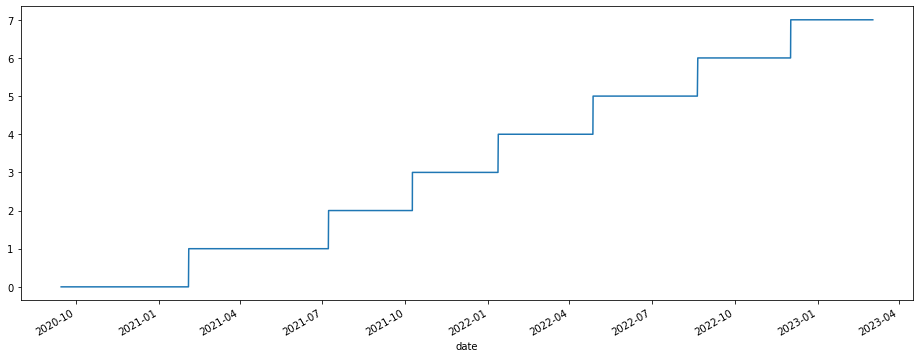

In [68]:
# Affichage de l'évolution du nombre de SV effectué sur un moteur
n=randint(0,len(series))
Avions[Avions['engine_serial_number']==series[n]]['Interpolate_WW_rank'].plot(figsize = (16,6))

In [69]:
# On vérifie qu'il n'y a plus de valeur manquante :
Avions.Interpolate_WW_rank.isnull().sum()

0

### 2.8 Traitement des valeurs manquantes pour var_env_1

In [70]:
Avions.var_env_1.isnull().sum() # Variable environnement 1 

451389

<AxesSubplot:xlabel='date'>

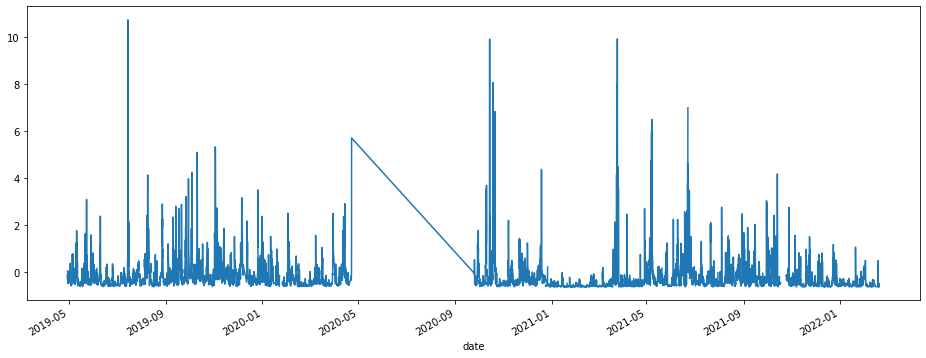

In [71]:
Avion1['var_env_1'].plot(figsize = (16,6))

In [72]:
Test=Avions.copy()

In [73]:
# On fait deux boucles pour limiter le temps de calculs 
# Attention il faut quand même compter 10 minutes pour effectuer cette cellule  
Avion_1= Test[Test['engine_serial_number']==calage_1]
Avion_1 = Avion_1.assign(Interpolate_var_env_1=Avion_1.var_env_1.interpolate(method='time'))

Avion_2= Test[Test['engine_serial_number']==calage_2]
Avion_2 = Avion_2.assign(Interpolate_var_env_1=Avion_2.var_env_1.interpolate(method='time'))


for i in series_1 :
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_var_env_1=avion_i.var_env_1.interpolate(method='time'))
    Avion_1=pd.concat( [Avion_1,avion])
    print("Chargement de l'avion", i, " sur ", "la première serie (jusqu'à :",series_1[-1],")")
    
for i in series_2 : 
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_var_env_1=avion_i.var_env_1.interpolate(method='time'))
    Avion_2 = pd.concat( [Avion_2,avion])
    print("Chargement de l'avion", i, " sur ", "la deuxieme serie (jusqu'à :",series_2[-1],")")

    
Avions=pd.concat([Avion_1,Avion_2])

Chargement de l'avion ESN_2  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_3  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_4  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_5  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_6  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_7  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_8  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_9  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_10  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_11  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_12  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_13  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_14  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_15  sur  la première

<AxesSubplot:xlabel='date'>

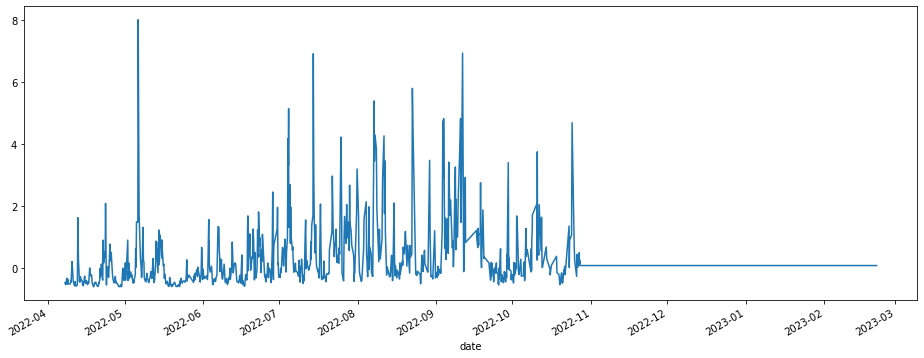

In [74]:
# Affichage de l'évolution du nombre de SV effectué sur un moteur
n=randint(0,len(series))
Avions[Avions['engine_serial_number']==series[n]]['Interpolate_var_env_1'].plot(figsize = (16,6))

In [75]:
# On vérifie qu'il n'y a plus de valeur manquante :
Avions.Interpolate_var_env_1.isnull().sum()

48876

In [76]:
Test= Avions.copy()

In [77]:
# On fait deux boucles pour limiter le temps de calculs 
# Attention il faut quand même compter 10 minutes pour effectuer cette cellule  
Avion_1= Test[Test['engine_serial_number']==calage_1]
Avion_1 = Avion_1.assign(Interpolate_var_env_1=Avion_1.Interpolate_var_env_1.interpolate(method='time', limit_direction='backward'))

Avion_2= Test[Test['engine_serial_number']==calage_2]
Avion_2 = Avion_2.assign(Interpolate_var_env_1=Avion_2.Interpolate_var_env_1.interpolate(method='time', limit_direction='backward'))


for i in series_1 :
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_var_env_1=avion_i.Interpolate_var_env_1.interpolate(method='time', limit_direction='backward'))
    Avion_1=pd.concat( [Avion_1,avion])
    print("Chargement de l'avion", i, " sur ", "la première serie (jusqu'à :",series_1[-1],")")
    
for i in series_2 : 
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_var_env_1=avion_i.Interpolate_var_env_1.interpolate(method='time', limit_direction='backward'))
    Avion_2 = pd.concat( [Avion_2,avion])
    print("Chargement de l'avion", i, " sur ", "la deuxieme serie (jusqu'à :",series_2[-1],")")

    
Avions=pd.concat([Avion_1,Avion_2])

Chargement de l'avion ESN_2  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_3  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_4  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_5  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_6  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_7  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_8  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_9  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_10  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_11  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_12  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_13  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_14  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_15  sur  la première

In [78]:
Avions.Interpolate_var_env_1.isnull().sum()

24963

In [79]:
Avions[Avions['Interpolate_var_env_1'].isnull()==True]['engine_serial_number'].unique()

array(['ESN_18', 'ESN_81', 'ESN_94', 'ESN_135', 'ESN_154', 'ESN_156',
       'ESN_201', 'ESN_224', 'ESN_225', 'ESN_260', 'ESN_329', 'ESN_1124',
       'ESN_1127', 'ESN_1172', 'ESN_1197', 'ESN_1198', 'ESN_1206',
       'ESN_1211', 'ESN_1215', 'ESN_1222', 'ESN_1227', 'ESN_1230',
       'ESN_1233', 'ESN_1259', 'ESN_1261', 'ESN_1276', 'ESN_1277',
       'ESN_1298', 'ESN_1303', 'ESN_1306', 'ESN_1308', 'ESN_1315',
       'ESN_1319', 'ESN_1321', 'ESN_1323', 'ESN_1332', 'ESN_1333',
       'ESN_1335', 'ESN_1342', 'ESN_1356', 'ESN_1357', 'ESN_1358',
       'ESN_1359', 'ESN_1361', 'ESN_1362', 'ESN_1363', 'ESN_1364',
       'ESN_1365', 'ESN_1366', 'ESN_1367', 'ESN_1370', 'ESN_1371',
       'ESN_1372', 'ESN_1373', 'ESN_1374', 'ESN_1375', 'ESN_1376',
       'ESN_1377', 'ESN_1378', 'ESN_1379', 'ESN_1380', 'ESN_1381',
       'ESN_1382', 'ESN_1383', 'ESN_1384', 'ESN_1385', 'ESN_1386',
       'ESN_1387', 'ESN_1388', 'ESN_1389', 'ESN_1390', 'ESN_1391',
       'ESN_1392', 'ESN_1393', 'ESN_1394', 'ESN_1395

In [80]:
Avions[Avions['Interpolate_var_env_1'].isnull()==True]['engine_serial_number'].nunique()

78

### 2.9 Traitement des valeurs manquantes pour var_env_2 

In [81]:
Avions.var_env_2.isnull().sum() # Variable environnement 2 

258150

<AxesSubplot:xlabel='date'>

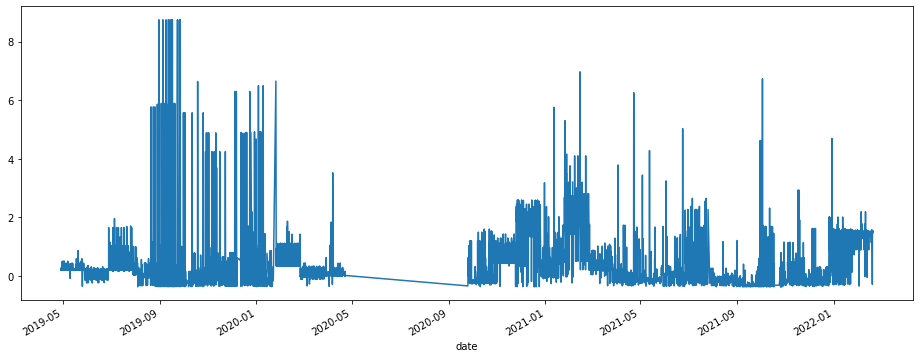

In [82]:
Avion1['var_env_2'].plot(figsize = (16,6))

In [83]:
Test=Avions.copy()

In [84]:
# On fait deux boucles pour limiter le temps de calculs 
# Attention il faut quand même compter 10 minutes pour effectuer cette cellule  
Avion_1= Test[Test['engine_serial_number']==calage_1]
Avion_1 = Avion_1.assign(Interpolate_var_env_2=Avion_1.var_env_2.interpolate(method='time'))

Avion_2= Test[Test['engine_serial_number']==calage_2]
Avion_2 = Avion_2.assign(Interpolate_var_env_2=Avion_2.var_env_2.interpolate(method='time'))


for i in series_1 :
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_var_env_2=avion_i.var_env_2.interpolate(method='time'))
    Avion_1=pd.concat( [Avion_1,avion])
    print("Chargement de l'avion", i, " sur ", "la première serie (jusqu'à :",series_1[-1],")")
    
for i in series_2 : 
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_var_env_2=avion_i.var_env_2.interpolate(method='time'))
    Avion_2 = pd.concat( [Avion_2,avion])
    print("Chargement de l'avion", i, " sur ", "la deuxieme serie (jusqu'à :",series_2[-1],")")

    
Avions=pd.concat([Avion_1,Avion_2])

Chargement de l'avion ESN_2  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_3  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_4  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_5  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_6  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_7  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_8  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_9  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_10  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_11  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_12  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_13  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_14  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_15  sur  la première

<AxesSubplot:xlabel='date'>

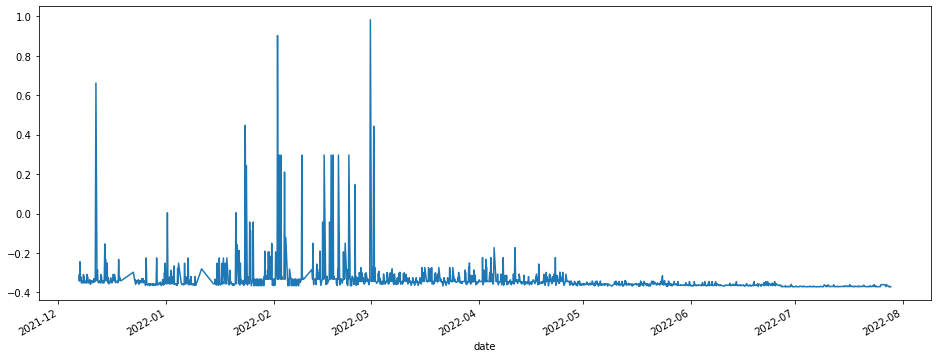

In [85]:
# Affichage de l'évolution du nombre de SV effectué sur un moteur
n=randint(0,len(series))
Avions[Avions['engine_serial_number']==series[n]]['Interpolate_var_env_2'].plot(figsize = (16,6))

In [86]:
# On vérifie qu'il n'y a plus de valeur manquante :
Avions.Interpolate_var_env_2.isnull().sum()

7872

In [87]:
Test = Avions.copy()

In [88]:
# On fait deux boucles pour limiter le temps de calculs 
# Attention il faut quand même compter 10 minutes pour effectuer cette cellule  
Avion_1= Test[Test['engine_serial_number']==calage_1]
Avion_1 = Avion_1.assign(Interpolate_var_env_2=Avion_1.Interpolate_var_env_2.interpolate(method='time', limit_direction='backward'))

Avion_2= Test[Test['engine_serial_number']==calage_2]
Avion_2 = Avion_2.assign(Interpolate_var_env_2=Avion_2.Interpolate_var_env_2.interpolate(method='time', limit_direction='backward'))


for i in series_1 :
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_var_env_2=avion_i.Interpolate_var_env_2.interpolate(method='time', limit_direction='backward'))
    Avion_1=pd.concat( [Avion_1,avion])
    print("Chargement de l'avion", i, " sur ", "la première serie (jusqu'à :",series_1[-1],")")
    
for i in series_2 : 
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_var_env_2=avion_i.Interpolate_var_env_2.interpolate(method='time', limit_direction='backward'))
    Avion_2 = pd.concat( [Avion_2,avion])
    print("Chargement de l'avion", i, " sur ", "la deuxieme serie (jusqu'à :",series_2[-1],")")

    
Avions=pd.concat([Avion_1,Avion_2])

Chargement de l'avion ESN_2  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_3  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_4  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_5  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_6  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_7  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_8  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_9  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_10  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_11  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_12  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_13  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_14  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_15  sur  la première

In [89]:
Avions.Interpolate_var_env_2.isnull().sum()

7744

In [90]:
Avions[Avions['Interpolate_var_env_2'].isnull()==True]['engine_serial_number'].unique()

array(['ESN_1124', 'ESN_1127', 'ESN_1172', 'ESN_1197', 'ESN_1198',
       'ESN_1206', 'ESN_1222', 'ESN_1227', 'ESN_1230', 'ESN_1233',
       'ESN_1259', 'ESN_1261', 'ESN_1276', 'ESN_1277', 'ESN_1298',
       'ESN_1303', 'ESN_1306', 'ESN_1308', 'ESN_1315', 'ESN_1319',
       'ESN_1321', 'ESN_1323', 'ESN_1332', 'ESN_1333', 'ESN_1335',
       'ESN_1342', 'ESN_1356', 'ESN_1357', 'ESN_1358', 'ESN_1359',
       'ESN_1361', 'ESN_1362', 'ESN_1363', 'ESN_1364', 'ESN_1365',
       'ESN_1366', 'ESN_1367', 'ESN_1370', 'ESN_1371', 'ESN_1372',
       'ESN_1373', 'ESN_1374', 'ESN_1375', 'ESN_1376', 'ESN_1377',
       'ESN_1378', 'ESN_1379', 'ESN_1380', 'ESN_1381', 'ESN_1382',
       'ESN_1383', 'ESN_1384', 'ESN_1385', 'ESN_1386', 'ESN_1387',
       'ESN_1388', 'ESN_1389', 'ESN_1390', 'ESN_1391', 'ESN_1392',
       'ESN_1393', 'ESN_1394', 'ESN_1395', 'ESN_1396', 'ESN_1397'],
      dtype=object)

In [91]:
Avions[Avions['Interpolate_var_env_2'].isnull()==True]['engine_serial_number'].nunique()

65

### 2.10 Traitement des valeurs manquantes pour var_env_3 

In [92]:
Avions.var_env_3.isnull().sum() # variable environnement 4 

625419

<AxesSubplot:xlabel='date'>

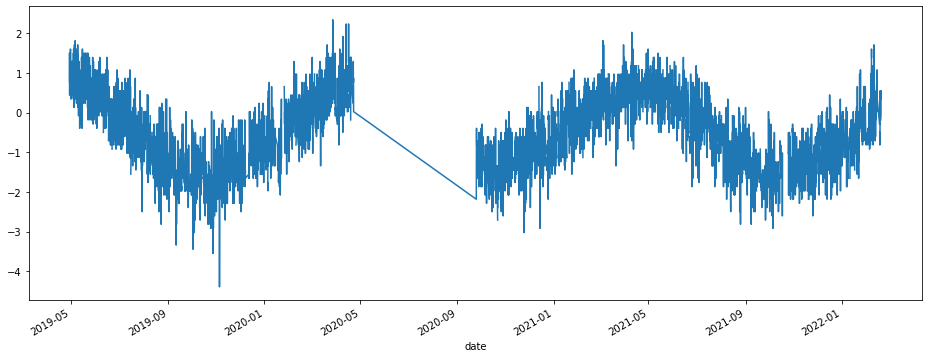

In [93]:
Avion1['var_env_3'].plot(figsize = (16,6))

In [94]:
Test=Avions.copy()

In [95]:
# On fait deux boucles pour limiter le temps de calculs 
# Attention il faut quand même compter 10 minutes pour effectuer cette cellule  
Avion_1= Test[Test['engine_serial_number']==calage_1]
Avion_1 = Avion_1.assign(Interpolate_var_env_3=Avion_1.var_env_3.interpolate(method='time'))

Avion_2= Test[Test['engine_serial_number']==calage_2]
Avion_2 = Avion_2.assign(Interpolate_var_env_3=Avion_2.var_env_3.interpolate(method='time'))


for i in series_1 :
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_var_env_3=avion_i.var_env_3.interpolate(method='time'))
    Avion_1=pd.concat( [Avion_1,avion])
    print("Chargement de l'avion", i, " sur ", "la première serie (jusqu'à :",series_1[-1],")")
    
for i in series_2 : 
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_var_env_3=avion_i.var_env_3.interpolate(method='time'))
    Avion_2 = pd.concat( [Avion_2,avion])
    print("Chargement de l'avion", i, " sur ", "la deuxieme serie (jusqu'à :",series_2[-1],")")

    
Avions=pd.concat([Avion_1,Avion_2])

Chargement de l'avion ESN_2  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_3  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_4  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_5  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_6  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_7  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_8  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_9  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_10  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_11  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_12  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_13  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_14  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_15  sur  la première

<AxesSubplot:xlabel='date'>

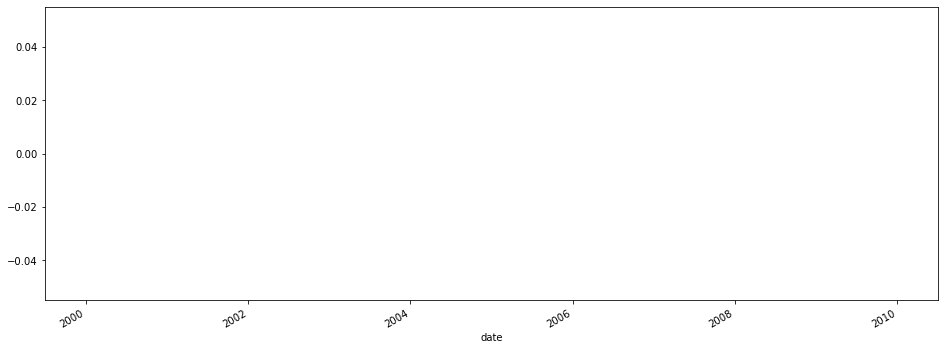

In [96]:
# Affichage de l'évolution du nombre de SV effectué sur un moteur
n=randint(0,len(series))
Avions[Avions['engine_serial_number']==series[n]]['Interpolate_var_env_3'].plot(figsize = (16,6))

In [97]:
# On vérifie qu'il n'y a plus de valeur manquante :
Avions.Interpolate_var_env_3.isnull().sum()

13193

Encore quelques valeurs manquantes. En général, c'est le cas pour la première valeur car on est dans une méthode forward ( par défaut) et non backward. On applique un backward pour ces valeurs

In [98]:
Test = Avions.copy()

In [99]:
# On fait deux boucles pour limiter le temps de calculs 
# Attention il faut quand même compter 10 minutes pour effectuer cette cellule  
Avion_1= Test[Test['engine_serial_number']==calage_1]
Avion_1 = Avion_1.assign(Interpolate_var_env_3=Avion_1.Interpolate_var_env_3.interpolate(method='time', limit_direction='backward'))

Avion_2= Test[Test['engine_serial_number']==calage_2]
Avion_2 = Avion_2.assign(Interpolate_var_env_3=Avion_2.Interpolate_var_env_3.interpolate(method='time', limit_direction='backward'))


for i in series_1 :
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_var_env_3=avion_i.Interpolate_var_env_3.interpolate(method='time', limit_direction='backward'))
    Avion_1=pd.concat( [Avion_1,avion])
    print("Chargement de l'avion", i, " sur ", "la première serie (jusqu'à :",series_1[-1],")")
    
for i in series_2 : 
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_var_env_3=avion_i.Interpolate_var_env_3.interpolate(method='time', limit_direction='backward'))
    Avion_2 = pd.concat( [Avion_2,avion])
    print("Chargement de l'avion", i, " sur ", "la deuxieme serie (jusqu'à :",series_2[-1],")")

    
Avions=pd.concat([Avion_1,Avion_2])

Chargement de l'avion ESN_2  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_3  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_4  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_5  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_6  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_7  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_8  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_9  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_10  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_11  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_12  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_13  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_14  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_15  sur  la première

In [100]:
Avions.Interpolate_var_env_3.isnull().sum()

8207

In [101]:
Avions[Avions['Interpolate_var_env_3'].isnull()==True]['engine_serial_number'].unique()

array(['ESN_1124', 'ESN_1127', 'ESN_1172', 'ESN_1197', 'ESN_1198',
       'ESN_1206', 'ESN_1211', 'ESN_1215', 'ESN_1222', 'ESN_1227',
       'ESN_1230', 'ESN_1233', 'ESN_1259', 'ESN_1261', 'ESN_1276',
       'ESN_1277', 'ESN_1298', 'ESN_1303', 'ESN_1306', 'ESN_1308',
       'ESN_1315', 'ESN_1319', 'ESN_1321', 'ESN_1323', 'ESN_1332',
       'ESN_1333', 'ESN_1335', 'ESN_1342', 'ESN_1356', 'ESN_1357',
       'ESN_1358', 'ESN_1359', 'ESN_1361', 'ESN_1362', 'ESN_1363',
       'ESN_1364', 'ESN_1365', 'ESN_1366', 'ESN_1367', 'ESN_1370',
       'ESN_1371', 'ESN_1372', 'ESN_1373', 'ESN_1374', 'ESN_1375',
       'ESN_1376', 'ESN_1377', 'ESN_1378', 'ESN_1379', 'ESN_1380',
       'ESN_1381', 'ESN_1382', 'ESN_1383', 'ESN_1384', 'ESN_1385',
       'ESN_1386', 'ESN_1387', 'ESN_1388', 'ESN_1389', 'ESN_1390',
       'ESN_1391', 'ESN_1392', 'ESN_1393', 'ESN_1394', 'ESN_1395',
       'ESN_1396', 'ESN_1397'], dtype=object)

In [102]:
Avions[Avions['Interpolate_var_env_3'].isnull()==True]['engine_serial_number'].nunique()

67

### 2.11 Traitement des valeurs manquantes pour var_env_4 

In [103]:
Avions.var_env_4.isnull().sum() # Variable environnement 4, attention variable catégorielle

622175

<AxesSubplot:xlabel='date'>

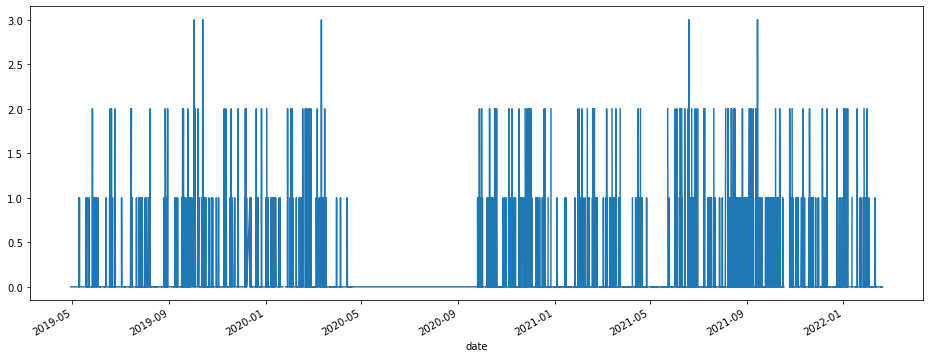

In [104]:
Avion1['var_env_4'].plot(figsize = (16,6))

In [105]:
Test=Avions.copy()

In [106]:
# On fait deux boucles pour limiter le temps de calculs 
# Attention il faut quand même compter 10 minutes pour effectuer cette cellule  
Avion_1= Test[Test['engine_serial_number']==calage_1]
Avion_1 = Avion_1.assign(Interpolate_var_env_4=Avion_1.var_env_4.interpolate(method='pad'))

Avion_2= Test[Test['engine_serial_number']==calage_2]
Avion_2 = Avion_2.assign(Interpolate_var_env_4=Avion_2.var_env_4.interpolate(method='pad'))


for i in series_1 :
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_var_env_4=avion_i.var_env_4.interpolate(method='pad'))
    Avion_1=pd.concat( [Avion_1,avion])
    print("Chargement de l'avion", i, " sur ", "la première serie (jusqu'à :",series_1[-1],")")
    
for i in series_2 : 
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_var_env_4=avion_i.var_env_4.interpolate(method='pad'))
    Avion_2 = pd.concat( [Avion_2,avion])
    print("Chargement de l'avion", i, " sur ", "la deuxieme serie (jusqu'à :",series_2[-1],")")


Avions=pd.concat([Avion_1,Avion_2])

Chargement de l'avion ESN_2  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_3  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_4  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_5  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_6  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_7  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_8  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_9  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_10  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_11  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_12  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_13  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_14  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_15  sur  la première

<AxesSubplot:xlabel='date'>

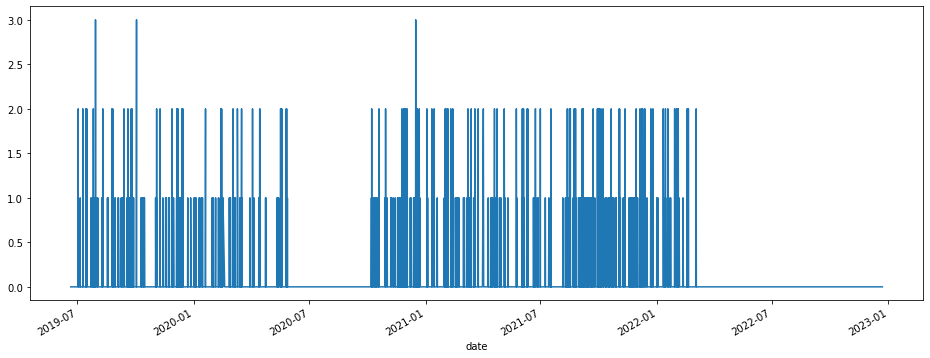

In [107]:
# Affichage de l'évolution du nombre de SV effectué sur un moteur
n=randint(0,len(series))
Avions[Avions['engine_serial_number']==series[n]]['Interpolate_var_env_4'].plot(figsize = (16,6))

In [108]:
# On vérifie qu'il n'y a plus de valeur manquante :
Avions.Interpolate_var_env_4.isnull().sum()

13193

Encore quelques valeurs manquantes. En général, c'est le cas pour la première valeur car on est dans une méthode forward ( par défaut) et non backward. On applique un backward pour ces valeurs

In [109]:
Test = Avions.copy()

In [110]:
# On fait deux boucles pour limiter le temps de calculs 
# Attention il faut quand même compter 10 minutes pour effectuer cette cellule  
Avion_1= Test[Test['engine_serial_number']==calage_1]
Avion_1 = Avion_1.assign(Interpolate_var_env_4=Avion_1.Interpolate_var_env_4.interpolate(method='linear', limit_direction='backward'))

Avion_2= Test[Test['engine_serial_number']==calage_2]
Avion_2 = Avion_2.assign(Interpolate_var_env_4=Avion_2.Interpolate_var_env_4.interpolate(method='linear', limit_direction='backward'))


for i in series_1 :
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_var_env_4=avion_i.Interpolate_var_env_4.interpolate(method='linear', limit_direction='backward'))
    Avion_1=pd.concat( [Avion_1,avion])
    print("Chargement de l'avion", i, " sur ", "la première serie (jusqu'à :",series_1[-1],")")
    
for i in series_2 : 
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_var_env_4=avion_i.Interpolate_var_env_4.interpolate(method='linear', limit_direction='backward'))
    Avion_2 = pd.concat( [Avion_2,avion])
    print("Chargement de l'avion", i, " sur ", "la deuxieme serie (jusqu'à :",series_2[-1],")")


Avions=pd.concat([Avion_1,Avion_2])

Chargement de l'avion ESN_2  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_3  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_4  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_5  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_6  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_7  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_8  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_9  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_10  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_11  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_12  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_13  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_14  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_15  sur  la première

In [111]:
Avions[Avions['Interpolate_var_env_4'].isnull()==True]['engine_serial_number'].unique()

array(['ESN_1124', 'ESN_1127', 'ESN_1172', 'ESN_1197', 'ESN_1198',
       'ESN_1206', 'ESN_1211', 'ESN_1215', 'ESN_1222', 'ESN_1227',
       'ESN_1230', 'ESN_1233', 'ESN_1259', 'ESN_1261', 'ESN_1276',
       'ESN_1277', 'ESN_1298', 'ESN_1303', 'ESN_1306', 'ESN_1308',
       'ESN_1315', 'ESN_1319', 'ESN_1321', 'ESN_1323', 'ESN_1332',
       'ESN_1333', 'ESN_1335', 'ESN_1342', 'ESN_1356', 'ESN_1357',
       'ESN_1358', 'ESN_1359', 'ESN_1361', 'ESN_1362', 'ESN_1363',
       'ESN_1364', 'ESN_1365', 'ESN_1366', 'ESN_1367', 'ESN_1370',
       'ESN_1371', 'ESN_1372', 'ESN_1373', 'ESN_1374', 'ESN_1375',
       'ESN_1376', 'ESN_1377', 'ESN_1378', 'ESN_1379', 'ESN_1380',
       'ESN_1381', 'ESN_1382', 'ESN_1383', 'ESN_1384', 'ESN_1385',
       'ESN_1386', 'ESN_1387', 'ESN_1388', 'ESN_1389', 'ESN_1390',
       'ESN_1391', 'ESN_1392', 'ESN_1393', 'ESN_1394', 'ESN_1395',
       'ESN_1396', 'ESN_1397'], dtype=object)

In [112]:
Avions.Interpolate_var_env_4.isnull().sum()

8207

In [113]:
Avions[Avions['Interpolate_var_env_4'].isnull()==True]['engine_serial_number'].nunique()

67

### 2.12 Traitement des valeurs manquantes pour var_env_5 

In [114]:
safran.var_env_5.isnull().sum() # Variable environnement 5 

625530

<AxesSubplot:xlabel='date'>

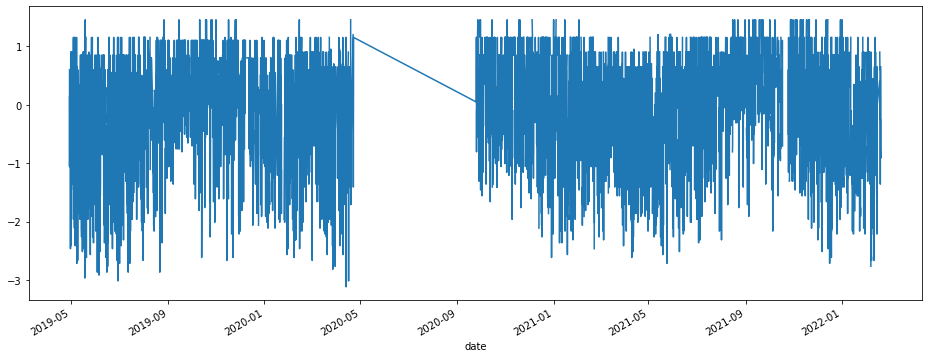

In [115]:
Avion1['var_env_5'].plot(figsize = (16,6))

In [116]:
Test=Avions.copy()

In [117]:
# On fait deux boucles pour limiter le temps de calculs 
# Attention il faut quand même compter 10 minutes pour effectuer cette cellule  
Avion_1= Test[Test['engine_serial_number']==calage_1]
Avion_1 = Avion_1.assign(Interpolate_var_env_5=Avion_1.var_env_5.interpolate(method='time'))

Avion_2= Test[Test['engine_serial_number']==calage_2]
Avion_2 = Avion_2.assign(Interpolate_var_env_5=Avion_2.var_env_5.interpolate(method='time'))


for i in series_1 :
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_var_env_5=avion_i.var_env_5.interpolate(method='time'))
    Avion_1=pd.concat( [Avion_1,avion])
    print("Chargement de l'avion", i, " sur ", "la première serie (jusqu'à :",series_1[-1],")")
    
for i in series_2 : 
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_var_env_5=avion_i.var_env_5.interpolate(method='time'))
    Avion_2 = pd.concat( [Avion_2,avion])
    print("Chargement de l'avion", i, " sur ", "la deuxieme serie (jusqu'à :",series_2[-1],")")

    
Avions=pd.concat([Avion_1,Avion_2])

Chargement de l'avion ESN_2  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_3  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_4  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_5  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_6  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_7  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_8  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_9  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_10  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_11  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_12  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_13  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_14  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_15  sur  la première

<AxesSubplot:xlabel='date'>

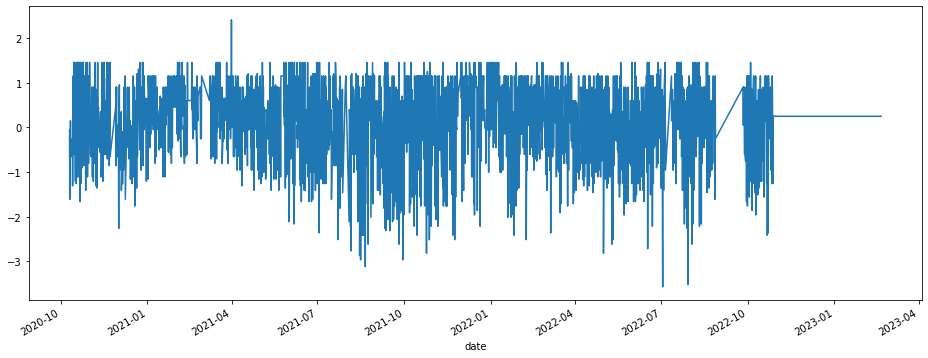

In [118]:
# Affichage de l'évolution du nombre de SV effectué sur un moteur
n=randint(0,len(series))
Avions[Avions['engine_serial_number']==series[n]]['Interpolate_var_env_5'].plot(figsize = (16,6))

In [119]:
# On vérifie qu'il n'y a plus de valeur manquante :
Avions.Interpolate_var_env_5.isnull().sum()

13193

Encore quelques valeurs manquantes. En général, c'est le cas pour la première valeur car on est dans une méthode forward ( par défaut) et non backward. On applique un backward pour ces dernières valeurs

In [120]:
Test = Avions.copy()

In [121]:
# On fait deux boucles pour limiter le temps de calculs 
# Attention il faut quand même compter 10 minutes pour effectuer cette cellule  
Avion_1= Test[Test['engine_serial_number']==calage_1]
Avion_1 = Avion_1.assign(Interpolate_var_env_5=Avion_1.Interpolate_var_env_5.interpolate(method='time',limit_direction='backward'))

Avion_2= Test[Test['engine_serial_number']==calage_2]
Avion_2 = Avion_2.assign(Interpolate_var_env_5=Avion_2.Interpolate_var_env_5.interpolate(method='time',limit_direction='backward'))


for i in series_1 :
    avion_i= Test[Test['engine_serial_number']==i]
    if i in Test[Test['Interpolate_var_env_5'].isnull()==True]['engine_serial_number'].unique(): 
        avion= avion_i.assign(Interpolate_var_env_5=avion_i.Interpolate_var_env_5.interpolate(method='time', limit_direction='backward'))
        Avion_1=pd.concat( [Avion_1,avion])
        print("Chargement de l'avion", i, " sur ", "la première serie (jusqu'à :",series_1[-1],")")
    else :
        Avion_1=pd.concat( [Avion_1,avion_i])
        print("Chargement de l'avion", i, " sur ", "la première serie (jusqu'à :",series_1[-1],")")
        
for i in series_2 : 
    avion_i= Test[Test['engine_serial_number']==i]
    if i in Test[Test['Interpolate_var_env_5'].isnull()==True]['engine_serial_number'].unique(): 
        avion= avion_i.assign(Interpolate_var_env_5=avion_i.Interpolate_var_env_5.interpolate(method='time', limit_direction='backward'))
        Avion_2 = pd.concat( [Avion_2,avion])
        print("Chargement de l'avion", i, " sur ", "la deuxieme serie (jusqu'à :",series_2[-1],")")
    else :
        Avion_2=pd.concat( [Avion_2,avion_i])
        print("Chargement de l'avion", i, " sur ", "la première serie (jusqu'à :",series_1[-1],")")
    
Avions=pd.concat([Avion_1,Avion_2])



Chargement de l'avion ESN_2  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_3  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_4  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_5  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_6  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_7  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_8  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_9  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_10  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_11  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_12  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_13  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_14  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_15  sur  la première

In [122]:
Avions.Interpolate_var_env_5.isnull().sum()

8207

In [123]:
Avions[Avions['Interpolate_var_env_5'].isnull()==True]['engine_serial_number'].unique()

array(['ESN_1124', 'ESN_1127', 'ESN_1172', 'ESN_1197', 'ESN_1198',
       'ESN_1206', 'ESN_1211', 'ESN_1215', 'ESN_1222', 'ESN_1227',
       'ESN_1230', 'ESN_1233', 'ESN_1259', 'ESN_1261', 'ESN_1276',
       'ESN_1277', 'ESN_1298', 'ESN_1303', 'ESN_1306', 'ESN_1308',
       'ESN_1315', 'ESN_1319', 'ESN_1321', 'ESN_1323', 'ESN_1332',
       'ESN_1333', 'ESN_1335', 'ESN_1342', 'ESN_1356', 'ESN_1357',
       'ESN_1358', 'ESN_1359', 'ESN_1361', 'ESN_1362', 'ESN_1363',
       'ESN_1364', 'ESN_1365', 'ESN_1366', 'ESN_1367', 'ESN_1370',
       'ESN_1371', 'ESN_1372', 'ESN_1373', 'ESN_1374', 'ESN_1375',
       'ESN_1376', 'ESN_1377', 'ESN_1378', 'ESN_1379', 'ESN_1380',
       'ESN_1381', 'ESN_1382', 'ESN_1383', 'ESN_1384', 'ESN_1385',
       'ESN_1386', 'ESN_1387', 'ESN_1388', 'ESN_1389', 'ESN_1390',
       'ESN_1391', 'ESN_1392', 'ESN_1393', 'ESN_1394', 'ESN_1395',
       'ESN_1396', 'ESN_1397'], dtype=object)

In [124]:
Avions[Avions['Interpolate_var_env_5'].isnull()==True]['engine_serial_number'].nunique()

67

67 moteurs différents sont encore concernés par les valeurs manquantes 

In [125]:
for i in Avions[Avions['Interpolate_var_env_5'].isnull()==True]['engine_serial_number'].unique() :
    if Avions[Avions['engine_serial_number']==i]['Interpolate_var_env_5'].isnull().sum()==Avions[Avions['engine_serial_number']==i].shape[0] == False :
        print(i)

Pour les variables manquantes : il n'y a aucune donnée sur ces moteurs pour la variable environnement 5 

In [126]:
# Enregistrement de la base 
Avions.to_csv('C:/Users/louis/OneDrive/Documents/ENSAE/2A/Safran/pretraitement.csv')

Notebook effectué en plusieurs fois. Nous enregistrons la base pour éviter de devoir tout relancer à chaque réouverture.

### 2. 13 - Traitement des valeurs manquantes problématiques 

In [4]:
path_Avions = 'C:/Users/louis/OneDrive/Documents/ENSAE/2A/Safran/pretraitement.csv'
Avions=pd.read_csv(path_Avions)

In [5]:
Avions.engine_serial_number.nunique()

1397

In [6]:
Avions.isnull().sum()

date                                 0
Unnamed: 0                           0
engine_serial_number                 0
engine_family                        0
engine_series                        0
cycles                               0
cycles_counter                       0
egt_margin                      992605
var_mot_1                       992607
flight_leg_hours                477302
event_rank                           0
egt_slope                        90397
SV_indicator                         0
SV_rank                         992605
Config_B_indicator                   0
Config_B_rank                   992605
WW_indicator                         0
WW_rank                         992605
config_A                             0
config_B                             0
var_env_1                       451389
var_env_2                       258150
var_env_3                       625419
var_env_4                       622175
var_env_5                       625530
Interpolate_egt_margin   

In [7]:
Avions['date'] = pd.to_datetime(Avions['date'], format="%Y/%m/%d %H:%M:%S")

In [8]:
# On revoit pour la variable flight_leg_hours      
series = Avions['engine_serial_number'].unique()
series_1,series_2 = series[0: int(len(series)/2)], series[int(len(series)/2):int(len(series))]

calage_1 = series_1[0]
calage_2 = series_2[0]

In [9]:
Avions.index = Avions['date']
del Avions['date']

In [10]:
Test = Avions.copy()

In [11]:
Avions.Interpolate_flight_leg_hours.isnull().sum()

8207

Encore des valeurs manquantes.

In [12]:
Avions[Avions['Interpolate_flight_leg_hours'].isnull()==True]['engine_serial_number'].unique()

array(['ESN_1124', 'ESN_1127', 'ESN_1172', 'ESN_1197', 'ESN_1198',
       'ESN_1206', 'ESN_1211', 'ESN_1215', 'ESN_1222', 'ESN_1227',
       'ESN_1230', 'ESN_1233', 'ESN_1259', 'ESN_1261', 'ESN_1276',
       'ESN_1277', 'ESN_1298', 'ESN_1303', 'ESN_1306', 'ESN_1308',
       'ESN_1315', 'ESN_1319', 'ESN_1321', 'ESN_1323', 'ESN_1332',
       'ESN_1333', 'ESN_1335', 'ESN_1342', 'ESN_1356', 'ESN_1357',
       'ESN_1358', 'ESN_1359', 'ESN_1361', 'ESN_1362', 'ESN_1363',
       'ESN_1364', 'ESN_1365', 'ESN_1366', 'ESN_1367', 'ESN_1370',
       'ESN_1371', 'ESN_1372', 'ESN_1373', 'ESN_1374', 'ESN_1375',
       'ESN_1376', 'ESN_1377', 'ESN_1378', 'ESN_1379', 'ESN_1380',
       'ESN_1381', 'ESN_1382', 'ESN_1383', 'ESN_1384', 'ESN_1385',
       'ESN_1386', 'ESN_1387', 'ESN_1388', 'ESN_1389', 'ESN_1390',
       'ESN_1391', 'ESN_1392', 'ESN_1393', 'ESN_1394', 'ESN_1395',
       'ESN_1396', 'ESN_1397'], dtype=object)

67 avions posent probleme 

In [13]:
Avions[Avions['Interpolate_var_env_1'].isnull()==True]['engine_serial_number'].nunique()

78

Un peu plus de problemes pour la variable env_1

In [14]:
Avions[Avions['Interpolate_var_env_2'].isnull()==True]['engine_serial_number'].nunique()

65

Un peu moins de problemes pour la variable env_2

In [15]:
set(Avions[Avions['Interpolate_flight_leg_hours'].isnull()==True]['engine_serial_number'].unique()) - set(Avions[Avions['Interpolate_var_env_5'].isnull()==True]['engine_serial_number'].unique())

set()

La liste des avions problematique pour la variable flight_leg_hours est la même que pour les variables environement 5,4 et 3 

In [16]:
# Les deux avions qui posent problemes pour les variables environnement et durée
set(Avions[Avions['Interpolate_flight_leg_hours'].isnull()==True]['engine_serial_number'].unique()) - set(Avions[Avions['Interpolate_var_env_2'].isnull()==True]['engine_serial_number'].unique()) 

{'ESN_1211', 'ESN_1215'}

In [17]:
set(Avions[Avions['Interpolate_var_env_1'].isnull()==True]['engine_serial_number'].unique()) - set(Avions[Avions['Interpolate_flight_leg_hours'].isnull()==True]['engine_serial_number'].unique())

{'ESN_135',
 'ESN_154',
 'ESN_156',
 'ESN_18',
 'ESN_201',
 'ESN_224',
 'ESN_225',
 'ESN_260',
 'ESN_329',
 'ESN_81',
 'ESN_94'}

In [18]:
Avions[Avions['engine_serial_number']=='ESN_1215']['Interpolate_flight_leg_hours'].isnull().sum()

225

In [19]:
Avions[Avions['engine_serial_number']=='ESN_1124']

,Unnamed: 0,engine_serial_number,engine_family,engine_series,cycles,cycles_counter,egt_margin,var_mot_1,flight_leg_hours,event_rank,...,Interpolate_var_mot_1,Interpolate_flight_leg_hours,Interpolate_SV_rank,Interpolate_Config_B_rank,Interpolate_WW_rank,Interpolate_var_env_1,Interpolate_var_env_2,Interpolate_var_env_3,Interpolate_var_env_4,Interpolate_var_env_5
date,,,,,,,,,,,,,,,,,,,,,
2022-10-30 18:42:26,2805672,ESN_1124,Engine_family_1,Engine_series_1,566.4851,566,0.415837,0.717470,NaN,0,...,0.717470,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2022-10-31 09:26:05,2805673,ESN_1124,Engine_family_1,Engine_series_1,570.1247,567,0.691838,-0.947979,NaN,0,...,-0.947979,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2022-10-31 13:48:14,2805674,ESN_1124,Engine_family_1,Engine_series_1,571.2044,568,0.718738,-1.744150,NaN,0,...,-1.744150,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2022-10-31 22:33:11,2805675,ESN_1124,Engine_family_1,Engine_series_1,573.3666,569,0.669873,0.379992,NaN,0,...,0.379992,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2022-11-01 02:54:58,2805676,ESN_1124,Engine_family_1,Engine_series_1,574.4448,570,0.823662,0.327560,NaN,0,...,0.327560,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-21 20:28:59,2805858,ESN_1124,Engine_family_1,Engine_series_1,755.0000,752,0.697069,0.867914,NaN,0,...,0.867914,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2023-02-22 17:16:42,2805859,ESN_1124,Engine_family_1,Engine_series_1,755.0000,753,0.343151,0.311094,NaN,0,...,0.311094,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2023-02-22 20:34:40,2805860,ESN_1124,Engine_family_1,Engine_series_1,755.0000,754,0.281203,0.837450,NaN,0,...,0.837450,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


65 moteurs posent problemes pour toutes les variables environnement et la variable de durée de vol. Une interpolation générale pour traiter ces valeurs manquantes nous semble risqué. Pour ne pas biaisé notre futur modéle, nous décidons de retirer ces moteurs.

In [20]:
# On retire les moteurs qui posent problémes pour presque toute les variables environnementales et de durée de vol
Avions.drop(Avions.index[Avions['flight_leg_hours'].isnull()],0, inplace=True)

In [21]:
Avions.isnull().sum()

Unnamed: 0                           0
engine_serial_number                 0
engine_family                        0
engine_series                        0
cycles                               0
cycles_counter                       0
egt_margin                      888716
var_mot_1                       888718
flight_leg_hours                     0
event_rank                           0
egt_slope                        82274
SV_indicator                         0
SV_rank                         888716
Config_B_indicator                   0
Config_B_rank                   888716
WW_indicator                         0
WW_rank                         888716
config_A                             0
config_B                             0
var_env_1                       106259
var_env_2                         2661
var_env_3                       280945
var_env_4                       277777
var_env_5                       281049
Interpolate_egt_margin               0
Interpolate_var_mot_1    

In [22]:
# On identifie les valeurs manquantes encore génantes pour la variable environnementale 1 :
Avions[Avions['Interpolate_var_env_1'].isnull()==True]['engine_serial_number'].unique()

array(['ESN_18', 'ESN_81', 'ESN_94', 'ESN_135', 'ESN_154', 'ESN_156',
       'ESN_201', 'ESN_224', 'ESN_225', 'ESN_260', 'ESN_329'],
      dtype=object)

On est en présence de 11 moteurs qui n'ont aucune valeur pour la variable environnementale 1. Cependant, aucune autre valeur manquante est présente pour les autres variables. Nous décidons d'interpoler pour récupérer les valeurs de la variable environementale 1, ce qui va potentiellement biaiser légérement le modéle pour cette varialbe ( mais seulement pour 11 moteurs). Nous n'obtons pas pour une suppression de ces moteurs puisque nous récupérons tout de même des valeurs justes des autres variables. 

In [23]:
Avions=Avions.assign(Interpolate_var_env_1=Avions.Interpolate_var_env_1.interpolate(method='time'))

In [24]:
Avions.isnull().sum()

Unnamed: 0                           0
engine_serial_number                 0
engine_family                        0
engine_series                        0
cycles                               0
cycles_counter                       0
egt_margin                      888716
var_mot_1                       888718
flight_leg_hours                     0
event_rank                           0
egt_slope                        82274
SV_indicator                         0
SV_rank                         888716
Config_B_indicator                   0
Config_B_rank                   888716
WW_indicator                         0
WW_rank                         888716
config_A                             0
config_B                             0
var_env_1                       106259
var_env_2                         2661
var_env_3                       280945
var_env_4                       277777
var_env_5                       281049
Interpolate_egt_margin               0
Interpolate_var_mot_1    

On est au point pour toutes les variables, execpté la variable "egt_slope", qui est notre variable d'interet : 

### 2. 14 - Variable egt_slope

<AxesSubplot:xlabel='date'>

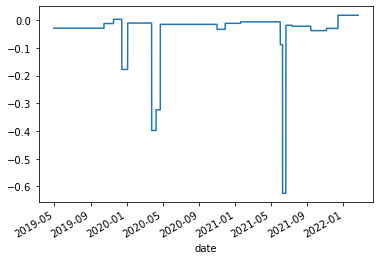

In [25]:
Avions[Avions.engine_serial_number =='ESN_1']['egt_slope'].plot()

In [26]:
Test=Avions.copy()
Test

,Unnamed: 0,engine_serial_number,engine_family,engine_series,cycles,cycles_counter,egt_margin,var_mot_1,flight_leg_hours,event_rank,...,Interpolate_var_mot_1,Interpolate_flight_leg_hours,Interpolate_SV_rank,Interpolate_Config_B_rank,Interpolate_WW_rank,Interpolate_var_env_1,Interpolate_var_env_2,Interpolate_var_env_3,Interpolate_var_env_4,Interpolate_var_env_5
date,,,,,,,,,,,,,,,,,,,,,
2019-04-29 06:29:58,1,ESN_1,Engine_family_1,Engine_series_1,14.699402,14,0.881646,-0.313549,0.857778,0,...,-0.313549,0.857778,0.0,0.0,0.0,-0.261068,0.193871,0.448627,0.0,0.601803
2019-04-29 08:10:00,2,ESN_1,Engine_family_1,Engine_series_1,15.284274,15,0.792029,0.006330,0.794167,0,...,0.006330,0.794167,0.0,0.0,0.0,-0.064202,0.273855,1.500848,0.0,-1.056965
2019-04-29 09:55:00,3,ESN_1,Engine_family_1,Engine_series_1,15.898185,16,0.706729,-0.286324,0.736667,0,...,-0.286324,0.736667,0.0,0.0,0.0,-0.292673,0.193871,0.764293,0.0,0.149412
2019-04-29 11:36:53,4,ESN_1,Engine_family_1,Engine_series_1,16.493874,17,0.702078,0.430174,0.802500,0,...,0.430174,0.802500,0.0,0.0,0.0,0.070056,0.273855,1.500848,0.0,-1.056965
2019-04-30 04:28:40,5,ESN_1,Engine_family_1,Engine_series_1,22.409543,18,0.645941,0.299420,0.817500,0,...,0.299420,0.817500,0.0,0.0,0.0,-0.463185,0.193871,0.448627,0.0,0.601803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-26 07:39:15,2911298,ESN_1369,Engine_family_1,Engine_series_6,34.993550,50,0.531868,-0.731730,2.654444,0,...,-0.731730,2.654444,0.0,0.0,0.0,0.728625,-0.356159,-0.708817,0.0,-1.207762
2022-10-26 11:36:39,2911299,ESN_1369,Engine_family_1,Engine_series_6,35.190820,51,0.973045,0.364383,2.501667,0,...,0.364383,2.501667,0.0,0.0,0.0,0.421328,-0.351647,-0.077484,0.0,0.199678
2022-10-27 03:55:34,2911301,ESN_1369,Engine_family_1,Engine_series_6,36.001950,53,0.800778,0.949444,2.165000,0,...,0.949444,2.165000,0.0,0.0,0.0,1.092857,-0.351647,0.343405,0.0,-0.403511


In [27]:
# On fait deux boucles pour limiter le temps de calculs 
# Attention il faut quand même compter 10 minutes pour effectuer cette cellule  
Avion_1= Test[Test['engine_serial_number']==calage_1]
Avion_1 = Avion_1.assign(Interpolate_egt_slope=Avion_1.egt_slope.interpolate(method='pad'))

Avion_2= Test[Test['engine_serial_number']==calage_2]
Avion_2 = Avion_2.assign(Interpolate_egt_slope=Avion_2.egt_slope.interpolate(method='pad'))


for i in series_1 :
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_egt_slope=avion_i.egt_slope.interpolate(method='pad'))
    Avion_1=pd.concat( [Avion_1,avion])
    print("Chargement de l'avion", i, " sur ", "la première serie (jusqu'à :",series_1[-1],")")
    
for i in series_2 : 
    avion_i= Test[Test['engine_serial_number']==i]
    avion= avion_i.assign(Interpolate_egt_slope=avion_i.egt_slope.interpolate(method='pad'))
    Avion_2 = pd.concat( [Avion_2,avion])
    print("Chargement de l'avion", i, " sur ", "la deuxieme serie (jusqu'à :",series_2[-1],")")


Avions=pd.concat([Avion_1,Avion_2])

Chargement de l'avion ESN_1  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_2  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_3  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_4  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_5  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_6  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_7  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_8  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_9  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_10  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_11  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_12  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_13  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_14  sur  la première 

18


<AxesSubplot:xlabel='date'>

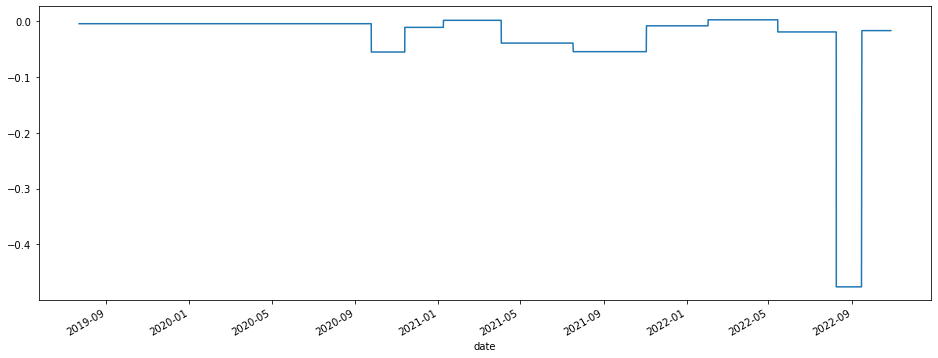

In [28]:
# Affichage de l'évolution du nombre de SV effectué sur un moteur
n=randint(0,len(series))
print(n)
Avions[Avions['engine_serial_number']==series[n]]['Interpolate_egt_slope'].plot(figsize = (16,6))

In [29]:
# On vérifie qu'il n'y a plus de valeur manquante :
Avions.Interpolate_egt_slope.isnull().sum()

3233

Il y a encore des valeurs manquantes, on utilise la méthode backward 

In [30]:
Test = Avions.copy()
Test

,Unnamed: 0,engine_serial_number,engine_family,engine_series,cycles,cycles_counter,egt_margin,var_mot_1,flight_leg_hours,event_rank,...,Interpolate_flight_leg_hours,Interpolate_SV_rank,Interpolate_Config_B_rank,Interpolate_WW_rank,Interpolate_var_env_1,Interpolate_var_env_2,Interpolate_var_env_3,Interpolate_var_env_4,Interpolate_var_env_5,Interpolate_egt_slope
date,,,,,,,,,,,,,,,,,,,,,
2019-04-29 06:29:58,1,ESN_1,Engine_family_1,Engine_series_1,14.699402,14,0.881646,-0.313549,0.857778,0,...,0.857778,0.0,0.0,0.0,-0.261068,0.193871,0.448627,0.0,0.601803,-0.029193
2019-04-29 08:10:00,2,ESN_1,Engine_family_1,Engine_series_1,15.284274,15,0.792029,0.006330,0.794167,0,...,0.794167,0.0,0.0,0.0,-0.064202,0.273855,1.500848,0.0,-1.056965,-0.029193
2019-04-29 09:55:00,3,ESN_1,Engine_family_1,Engine_series_1,15.898185,16,0.706729,-0.286324,0.736667,0,...,0.736667,0.0,0.0,0.0,-0.292673,0.193871,0.764293,0.0,0.149412,-0.029193
2019-04-29 11:36:53,4,ESN_1,Engine_family_1,Engine_series_1,16.493874,17,0.702078,0.430174,0.802500,0,...,0.802500,0.0,0.0,0.0,0.070056,0.273855,1.500848,0.0,-1.056965,-0.029193
2019-04-30 04:28:40,5,ESN_1,Engine_family_1,Engine_series_1,22.409543,18,0.645941,0.299420,0.817500,0,...,0.817500,0.0,0.0,0.0,-0.463185,0.193871,0.448627,0.0,0.601803,-0.029193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-26 07:39:15,2911298,ESN_1369,Engine_family_1,Engine_series_6,34.993550,50,0.531868,-0.731730,2.654444,0,...,2.654444,0.0,0.0,0.0,0.728625,-0.356159,-0.708817,0.0,-1.207762,0.000968
2022-10-26 11:36:39,2911299,ESN_1369,Engine_family_1,Engine_series_6,35.190820,51,0.973045,0.364383,2.501667,0,...,2.501667,0.0,0.0,0.0,0.421328,-0.351647,-0.077484,0.0,0.199678,0.000968
2022-10-27 03:55:34,2911301,ESN_1369,Engine_family_1,Engine_series_6,36.001950,53,0.800778,0.949444,2.165000,0,...,2.165000,0.0,0.0,0.0,1.092857,-0.351647,0.343405,0.0,-0.403511,0.000968


In [31]:
# On fait deux boucles pour limiter le temps de calculs 
# Attention il faut quand même compter 10 minutes pour effectuer cette cellule  
Avion_1= Test[Test['engine_serial_number']==calage_1]
Avion_1 = Avion_1.assign(Interpolate_egt_slope=Avion_1.Interpolate_egt_slope.interpolate(method='time',limit_direction='backward'))

Avion_2= Test[Test['engine_serial_number']==calage_2]
Avion_2 = Avion_2.assign(Interpolate_egt_slope=Avion_2.Interpolate_egt_slope.interpolate(method='time',limit_direction='backward'))


for i in series_1 :
    avion_i= Test[Test['engine_serial_number']==i]
    if i in Test[Test['Interpolate_egt_slope'].isnull()==True]['engine_serial_number'].unique(): 
        avion= avion_i.assign(Interpolate_egt_slope=avion_i.Interpolate_egt_slope.interpolate(method='time', limit_direction='backward'))
        Avion_1=pd.concat( [Avion_1,avion])
        print("Chargement de l'avion", i, " sur ", "la première serie (jusqu'à :",series_1[-1],")")
    else :
        Avion_1=pd.concat( [Avion_1,avion_i])
        print("Chargement de l'avion", i, " sur ", "la première serie (jusqu'à :",series_1[-1],")")
        
for i in series_2 : 
    avion_i= Test[Test['engine_serial_number']==i]
    if i in Test[Test['Interpolate_egt_slope'].isnull()==True]['engine_serial_number'].unique(): 
        avion= avion_i.assign(Interpolate_egt_slope=avion_i.Interpolate_egt_slope.interpolate(method='time', limit_direction='backward'))
        Avion_2 = pd.concat( [Avion_2,avion])
        print("Chargement de l'avion", i, " sur ", "la deuxieme serie (jusqu'à :",series_2[-1],")")
    else :
        Avion_2=pd.concat( [Avion_2,avion_i])
        print("Chargement de l'avion", i, " sur ", "la deuxieme serie (jusqu'à :",series_2[-1],")")
    
Avions=pd.concat([Avion_1,Avion_2])

Chargement de l'avion ESN_1  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_2  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_3  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_4  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_5  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_6  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_7  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_8  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_9  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_10  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_11  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_12  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_13  sur  la première serie (jusqu'à : ESN_698 )
Chargement de l'avion ESN_14  sur  la première 

In [32]:
Avions.Interpolate_egt_slope.isnull().sum()

153

Encore des valeurs manquantes

In [33]:
Avions[Avions['Interpolate_egt_slope'].isnull()==True]['engine_serial_number'].unique()

array(['ESN_922', 'ESN_1264'], dtype=object)

La pente pose problème pour deux moteurs. 

In [34]:
Avions[Avions['Interpolate_egt_margin'].isnull()==True]['engine_serial_number'].unique()

array([], dtype=object)

La pente est absente pour ces deux avions mais peut être retrouver à l'aide de la variable "Interpolate EGT margin". 
La pente est calculée entre deux événements de Water Washer : Event Rank

In [35]:
Avions[Avions['engine_serial_number']=='ESN_922']['event_rank'].unique()

array([0], dtype=int64)

In [38]:
Avions[Avions['engine_serial_number']=='ESN_1264']['event_rank'].unique()

array([0], dtype=int64)

Pour cet avion ( ESN_922) il n'y a eu aucun événement d'entretien. La pente est donc le résultat de la différence entre la norme EGT du dernier vol - la norme egt du premier vol, le tout divisé par en moyenne 45. 

Provisoirement on divise par 45, en l'attendante de plus d'information pour dénormaliser puis refaire un calcul plus adapté. 

In [46]:
slope_ESN_1264 = (Avions[Avions['engine_serial_number']=='ESN_1264']['Interpolate_egt_margin'][-1] - Avions[Avions['engine_serial_number']=='ESN_1264']['Interpolate_egt_margin'][0])/45

In [61]:
Avions[Avions['engine_serial_number']=='ESN_1264'] = Avions[Avions['engine_serial_number']=='ESN_1264'].fillna(value=slope_ESN_1264)

In [62]:
Avions[Avions['engine_serial_number']=='ESN_1264'] 

,Unnamed: 0,engine_serial_number,engine_family,engine_series,cycles,cycles_counter,egt_margin,var_mot_1,flight_leg_hours,event_rank,...,Interpolate_flight_leg_hours,Interpolate_SV_rank,Interpolate_Config_B_rank,Interpolate_WW_rank,Interpolate_var_env_1,Interpolate_var_env_2,Interpolate_var_env_3,Interpolate_var_env_4,Interpolate_var_env_5,Interpolate_egt_slope
date,,,,,,,,,,,,,,,,,,,,,
2022-09-24 08:07:26,2875865,ESN_1264,Engine_family_1,Engine_series_1,77.41146,77,-0.006975,-0.006975,1.582778,0,...,1.582778,0.0,0.0,0.0,-0.588143,-0.236934,0.238182,0.0,0.199678,-0.006975
2022-09-24 11:37:20,2875866,ESN_1264,Engine_family_1,Engine_series_1,78.05792,78,-0.006975,-0.006975,1.556111,0,...,1.556111,0.0,0.0,0.0,-0.455735,-0.310368,0.238182,0.0,0.199678,-0.006975
2022-09-24 14:25:32,2875867,ESN_1264,Engine_family_1,Engine_series_1,78.70439,79,-0.006975,-0.006975,1.248889,0,...,1.248889,0.0,0.0,0.0,-0.479013,-0.356872,0.238182,0.0,0.199678,-0.006975
2022-09-24 22:33:12,2875868,ESN_1264,Engine_family_1,Engine_series_1,79.35085,80,0.341764,0.753494,0.995000,0,...,0.995000,0.0,0.0,0.0,-0.503911,-0.310368,0.238182,0.0,0.199678,-0.006975
2022-09-25 01:24:05,2875869,ESN_1264,Engine_family_1,Engine_series_1,79.67623,81,0.282084,0.712591,1.400833,0,...,1.400833,0.0,0.0,0.0,-0.511370,-0.297743,0.238182,0.0,0.199678,-0.006975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-25 12:48:19,2876011,ESN_1264,Engine_family_1,Engine_series_1,269.06600,223,-0.006975,-0.006975,2.551111,0,...,2.551111,0.0,0.0,0.0,-0.523022,-0.337355,-0.077484,0.0,-0.051651,-0.006975
2022-10-26 06:36:01,2876012,ESN_1264,Engine_family_1,Engine_series_1,271.37410,224,-0.006975,-0.006975,2.072778,0,...,2.072778,0.0,0.0,0.0,-0.608723,-0.324236,-1.340150,0.0,-1.408825,-0.006975
2022-10-26 11:42:32,2876013,ESN_1264,Engine_family_1,Engine_series_1,273.68220,225,-0.006975,-0.006975,4.089444,0,...,4.089444,0.0,0.0,0.0,-0.484056,-0.211525,-2.392371,0.0,0.249943,-0.006975


In [63]:
slope_ESN_922 = (Avions[Avions['engine_serial_number']=='ESN_922']['Interpolate_egt_margin'][-1] - Avions[Avions['engine_serial_number']=='ESN_922']['Interpolate_egt_margin'][0])/45

In [65]:
Avions[Avions['engine_serial_number']=='ESN_922'] = Avions[Avions['engine_serial_number']=='ESN_922'].fillna(value=slope_ESN_922)

In [66]:
Avions[Avions['engine_serial_number']=='ESN_922'] 

,Unnamed: 0,engine_serial_number,engine_family,engine_series,cycles,cycles_counter,egt_margin,var_mot_1,flight_leg_hours,event_rank,...,Interpolate_flight_leg_hours,Interpolate_SV_rank,Interpolate_Config_B_rank,Interpolate_WW_rank,Interpolate_var_env_1,Interpolate_var_env_2,Interpolate_var_env_3,Interpolate_var_env_4,Interpolate_var_env_5,Interpolate_egt_slope
date,,,,,,,,,,,,,,,,,,,,,
2022-06-22 12:45:32,2604742,ESN_922,Engine_family_1,Engine_series_1,5.957494,5,0.761603,0.937886,6.604167,0,...,6.604167,0.0,0.0,0.0,-0.346208,-0.357455,-0.708817,0.0,0.400740,-0.000564
2022-06-22 20:56:20,2604743,ESN_922,Engine_family_1,Engine_series_1,6.036925,6,0.874422,0.978311,4.798056,0,...,4.798056,0.0,0.0,0.0,0.576126,-0.363169,0.659071,2.0,-0.906168,-0.000564
2022-07-06 22:32:37,2604744,ESN_922,Engine_family_1,Engine_series_1,17.259940,7,0.774523,0.103441,0.519167,0,...,0.519167,0.0,0.0,0.0,-0.609970,-0.367304,-0.287928,0.0,0.400740,-0.000564
2022-07-07 14:26:59,2604748,ESN_922,Engine_family_1,Engine_series_1,17.848450,11,-0.000564,-0.000564,0.580278,0,...,0.580278,0.0,0.0,0.0,-0.606600,-0.364584,-0.603595,0.0,0.149412,-0.000564
2022-07-07 15:38:50,2604749,ESN_922,Engine_family_1,Engine_series_1,17.995580,12,1.088475,1.520102,0.483333,0,...,0.483333,0.0,0.0,0.0,-0.606267,-0.367303,0.343405,0.0,0.652069,-0.000564
2022-07-07 18:35:11,2604750,ESN_922,Engine_family_1,Engine_series_1,18.122000,13,0.807032,0.220706,0.458611,0,...,0.458611,0.0,0.0,0.0,-0.604198,-0.364584,-0.498373,2.0,-0.051651,-0.000564
2022-07-07 19:47:25,2604751,ESN_922,Engine_family_1,Engine_series_1,18.339200,14,-0.000564,-0.000564,0.498611,0,...,0.498611,0.0,0.0,0.0,-0.605490,-0.367303,0.448627,0.0,-0.001385,-0.000564
2022-07-07 22:51:33,2604752,ESN_922,Engine_family_1,Engine_series_1,18.556400,15,-0.000564,-0.000564,0.830000,0,...,0.830000,0.0,0.0,0.0,-0.603788,-0.364584,-0.814039,0.0,1.154726,-0.000564
2022-07-08 01:10:00,2604753,ESN_922,Engine_family_1,Engine_series_1,18.773600,16,-0.000564,-0.000564,0.766667,0,...,0.766667,0.0,0.0,0.0,-0.604294,-0.363348,-0.077484,0.0,1.456320,-0.000564


In [67]:
Avions.isnull().sum()

Unnamed: 0                           0
engine_serial_number                 0
engine_family                        0
engine_series                        0
cycles                               0
cycles_counter                       0
egt_margin                      894206
var_mot_1                       894208
flight_leg_hours                     0
event_rank                           0
egt_slope                        82121
SV_indicator                         0
SV_rank                         894206
Config_B_indicator                   0
Config_B_rank                   894206
WW_indicator                         0
WW_rank                         894206
config_A                             0
config_B                             0
var_env_1                       106566
var_env_2                         2661
var_env_3                       283715
var_env_4                       280544
var_env_5                       283819
Interpolate_egt_margin               0
Interpolate_var_mot_1    

In [68]:
Avions.to_csv('C:/Users/louis/OneDrive/Documents/ENSAE/2A/Safran/pretraitement.csv')